# ARMA model fitting and statistics evaluations

Read datasets already computed


In [1]:
# read csv datasets in folder and save them in dataframes

import pandas as pd
import matplotlib.pyplot as plt

names = ["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "target"]
dataset_no_drift = pd.read_csv("dataset_no_drift.csv", names=names)
dataset_drift_labels = pd.read_csv("dataset_drift_labels.csv", names=names)
dataset_drift_features = pd.read_csv("dataset_drift_features.csv", names=names)

# print dataset_no_drift shape
print(dataset_no_drift.shape)
dataset_size = dataset_no_drift.shape


(20000, 7)


In [2]:
# compute list of features indexes and the binary label
features = dataset_no_drift.columns[:-1]
target = dataset_no_drift.columns[-1]
print(list(features), target)


['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'] target


Plot ACF and PACF plots: auto-correlation and partial auto-correlation plots. These plots are evaluated on the first 200 time series steps for ease of showing the results graphically. The plots refer to the dataset with no concept drift. The lags are set to 20.

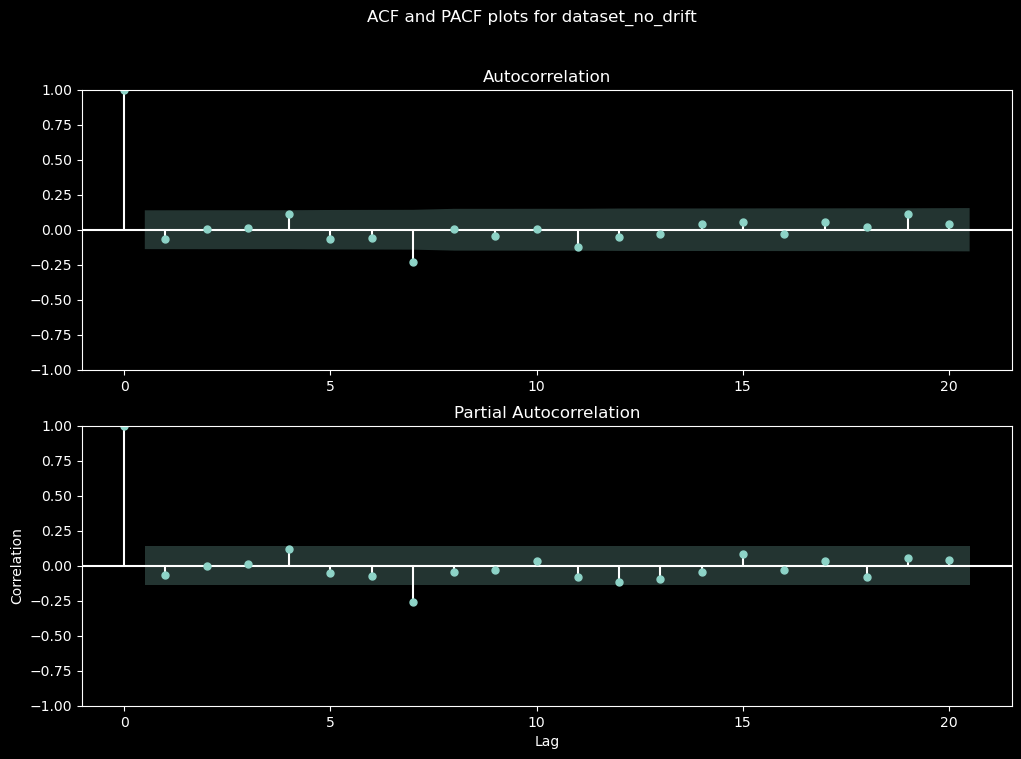

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Visualizations lag values
lag_acf = 20
lag_pacf = 20

# Plotting the ACF and PACF plots in a single figure
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataset_no_drift.iloc[0:200, 0], lags=lag_acf, ax=axes[0])
plot_pacf(dataset_no_drift.iloc[0:200, 0], lags=lag_pacf, ax=axes[1], method='ols')
plt.suptitle("ACF and PACF plots for dataset_no_drift")
plt.xlabel("Lag")
plt.ylabel("Correlation")

plt.show()



The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are used to identify the order of the AR (autoregressive) and MA (moving average) terms in an ARMA (autoregressive moving average) process.

However, if the ARMA process is non-linear, the ACF and PACF plots may not be sufficient to identify the order of the AR and MA terms. This is because non-linear ARMA processes can exhibit complex dependencies that are not captured by the ACF and PACF plots.

In such cases, it **may be necessary to use other techniques**, such as model selection criteria (such as the Akaike Information Criterion or Bayesian Information Criterion) or machine learning methods to identify the order of the AR and MA terms in the non-linear ARMA process.

Therefore, the results of ACF and PACF plots on a non-linear ARMA process may **not be conclusive** in determining the appropriate AR and MA terms to use in modeling the process.

### Fit ARMA model to the time series, with high order parameters

Fit ARMA(p, q) model to the dataset, with p = 10, q = 10. No seasonality included

In [35]:
from statsmodels.tsa.arima.model import ARIMA

#using the p, q values from the creation of the dataset
model = ARIMA(dataset_no_drift.iloc[0:200, 0], order=(10, 0, 10))
model_fit = model.fit()

# print model summary
print(model_fit.summary())


d:\Programs\Anaconda\envs\anndl\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Programs\Anaconda\envs\anndl\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Programs\Anaconda\envs\anndl\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               feature1   No. Observations:                  200
Model:               ARIMA(10, 0, 10)   Log Likelihood                 156.789
Date:                Fri, 26 May 2023   AIC                           -269.578
Time:                        13:08:10   BIC                           -197.015
Sample:                             0   HQIC                          -240.213
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.005      0.608      0.543      -0.007       0.013
ar.L1         -0.1866      2.699     -0.069      0.945      -5.476       5.103
ar.L2         -0.0280      1.993     -0.014      0.9

Let's analyze each of the test results individually:

- Ljung-Box (L1) (Q): 0.00, Prob(Q): 0.95:
The Ljung-Box test is a statistical test used to determine whether the residuals of a time series are independently distributed or whether there is some serial correlation present. In this case, the results suggest that there is evidence of serial correlation in the residuals of the time series.

- Jarque-Bera (JB): 0.21, Prob(JB): 0.90:
The Jarque-Bera test is a statistical test used to determine whether a data sample has skewness and kurtosis that matches a normal distribution. In this case, the test statistic (JB) is 0.21, and the probability value (Prob(JB)) is 0.90. Since the probability value is greater than 0.05 (i.e., the commonly used significance level), we can conclude that the sample is likely drawn from a normal distribution.

- Heteroskedasticity (H): 0.85, Prob(H) (two-sided): 0.52:
The term heteroskedasticity refers to the situation where the variance of the residuals in a regression or time series model is not constant over time. In this case, the test statistic (H) is 0.85, and the probability value (Prob(H)) is 0.52. Since the probability value is greater than 0.05, we can conclude that it doesn't suffer from heteroskedasticity in the time series.

Overall, based on the statistical test results provided, it appears that **the time series does not exhibit serial correlation, is likely normally distributed, and does not suffer from heteroskedasticity.**

### Statistical tests

Plot model diagnostics of the ARMA model


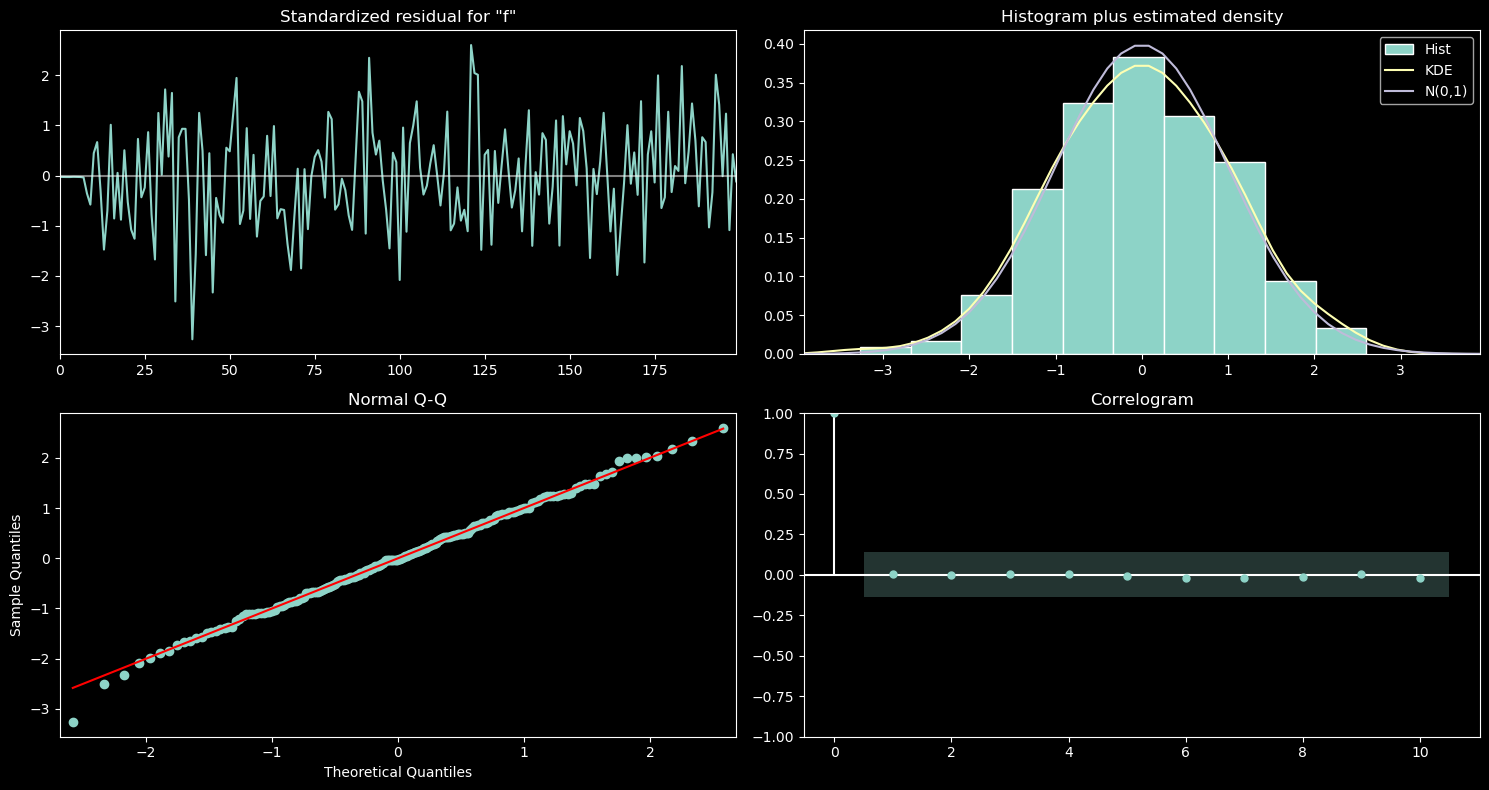

In [36]:
model_fit.plot_diagnostics(figsize=(15,8))
plt.tight_layout()
plt.show()

From these plots it appears that the ARMA(p, q) model fits well the data provided. Although, from the first plot, the one with the standardized residuals, we can determine that the residuals are of the same order of the time series values. This implies that the residuals are not negligible at all, and that the model fitting is not appropriate at all to the time series. The other plots may be deceiving because their results are not significant, since they are not meant to be used with non linear ARMA models

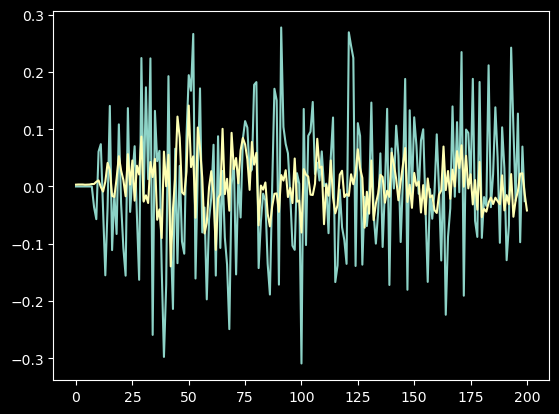

Test RMSE: 0.110


In [37]:
#plot model predictions overlapped with the actual values of the dataset
plt.plot(dataset_no_drift.iloc[0:200, 0])
plt.plot(model_fit.predict(0, 200))
#plot width and height
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

# evaluate model accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate root mean squared error
rmse = sqrt(mean_squared_error(dataset_no_drift.iloc[0:200, 0], model_fit.predict(0, 199)))
print('Test RMSE: %.3f' % rmse)


From the predictions of this model, we can evince that the root mean square error is not low and it is considerable with respect the time series values. So, we can confirm that this model doesn't provide good results at all.

In [38]:
#compute augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset_no_drift.iloc[:, 0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Number of Observations Used: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# p-value is less than 0.05, so we can reject the null hypothesis that the data is not stationary
# therefore we conclude that the data is stationary


ADF Statistic: -34.371083
p-value: 0.000000
Lags Used: 20.000000
Number of Observations Used: 19979.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The augmented Dickey Fuller test is a unit root test, to check the stationaruity of the time series. Since the p-value is less than 0.05, so we can reject the null hypothesis that the data is not stationary. Therefore we conclude that the data is stationary.

# Cross correlation between variables and their lagged version

### Computation of the heatmap containing the cross-correlation values of the features and their lagged version of themselves

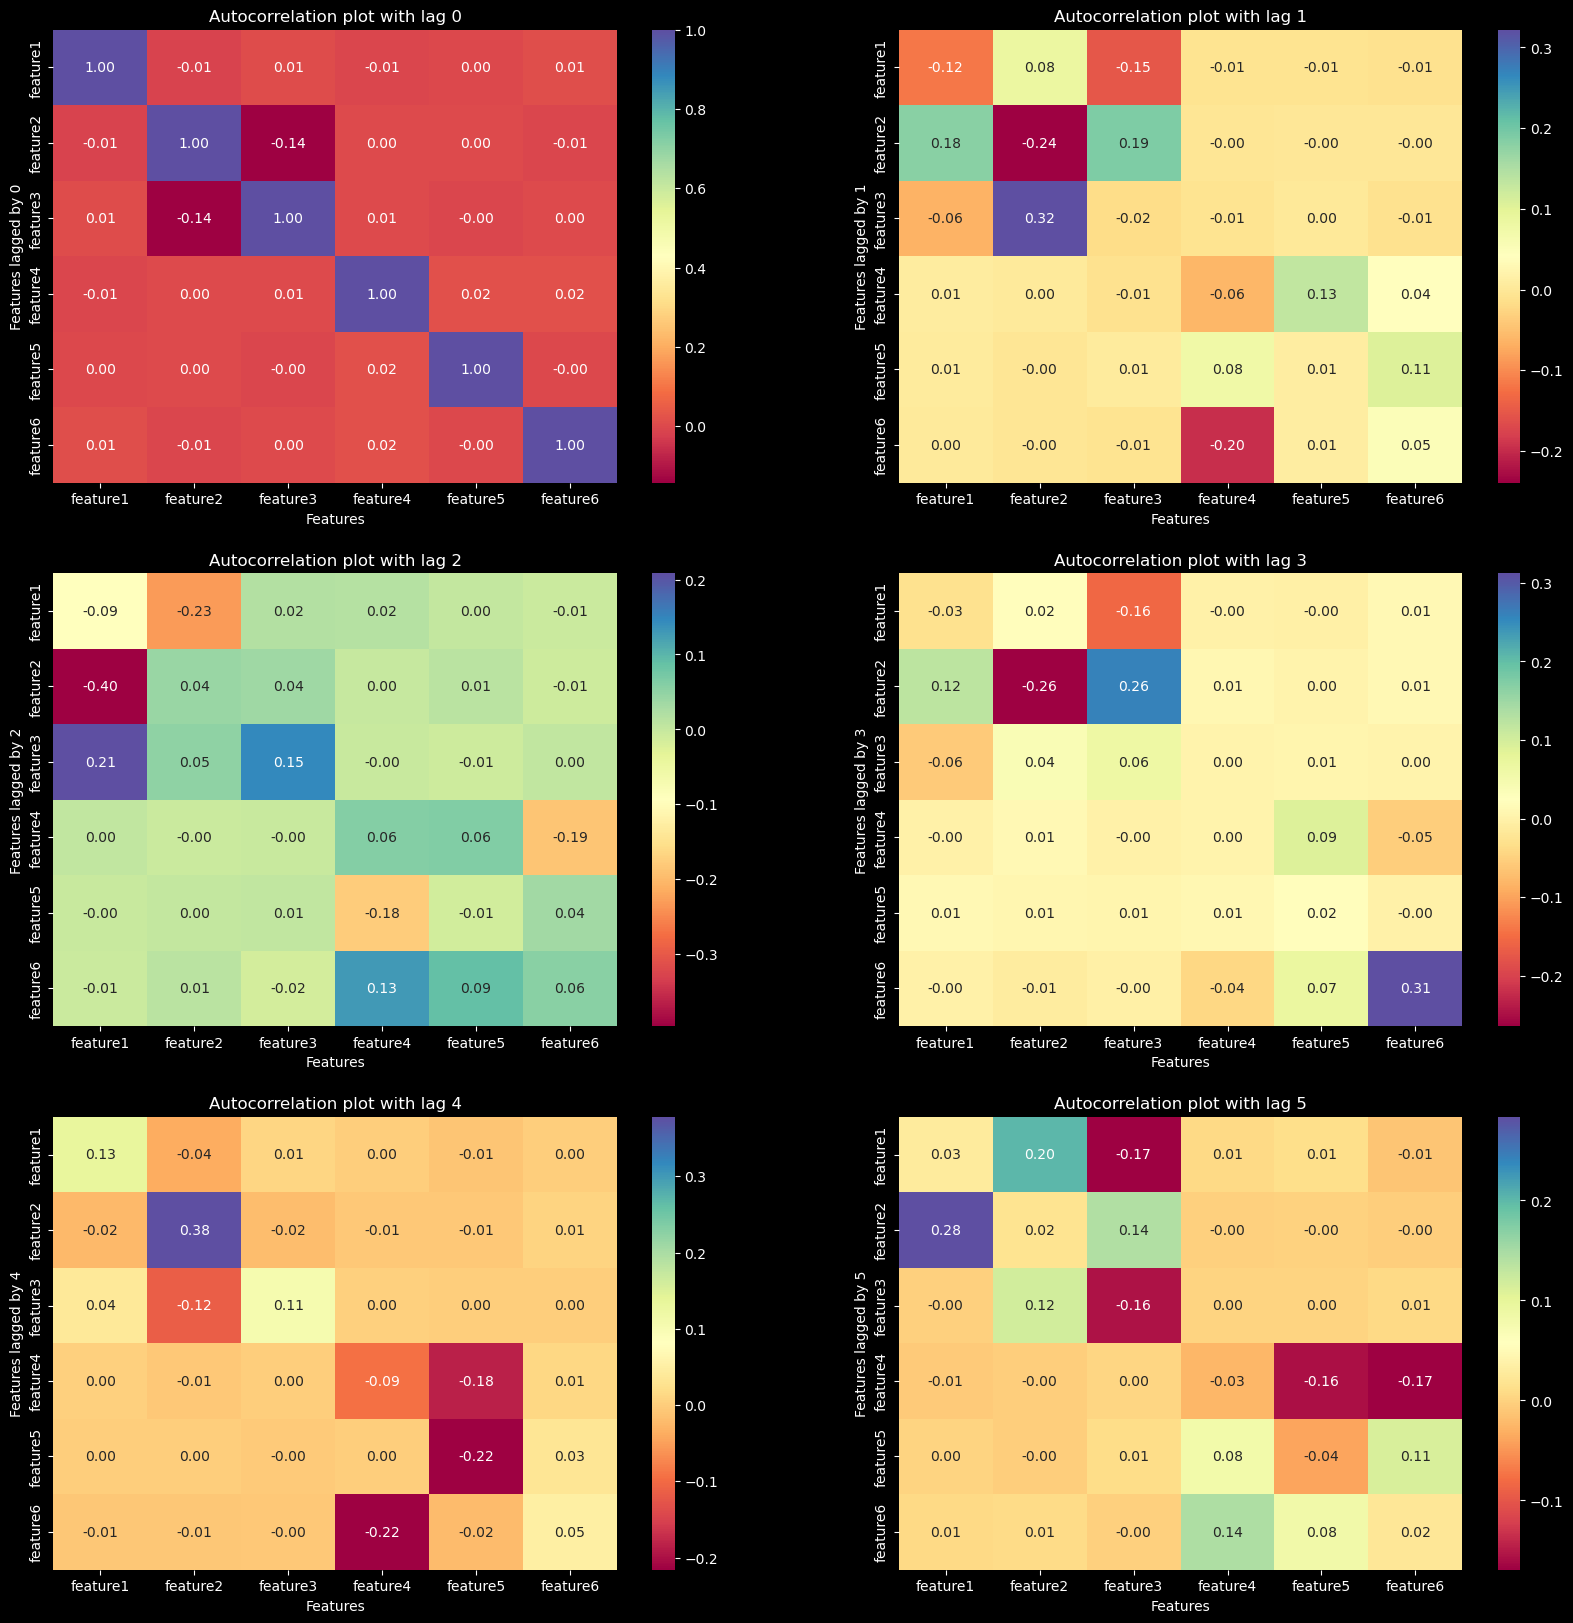

In [3]:
import seaborn as sns
import numpy as np

# create empty array to store the cross-correlation values, for each feature and lag up to lag=6
crosscorr = np.empty((6, 6, 6))

# Compute the cross-correlation for each feature and lag up to 6
for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        for k in range(6):
            crosscorr[i, j, k] = dataset_no_drift[feature_x].corr(dataset_no_drift[feature_y].shift(k))

# Plot the cross-correlation matrix as a figure with 3x2 squared subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(crosscorr[:, :, i], annot=True, fmt=".2f", cmap='Spectral', ax=ax)
    ax.set_title("Autocorrelation plot with lag {}".format(i))
    ax.set_xlabel("Features")
    ax.set_ylabel("Features lagged by {}".format(i))
    # add x and y ticks
    ax.set_xticks(np.arange(6)+0.5)
    ax.set_yticks(np.arange(6)+0.5)
    ax.set_xticklabels(features)
    ax.set_yticklabels(features)


plt.show()

In these plots we can evince the results of the cross-correlation between the different features in the dataset. Although the numbers are close to 0, the colored plots help to see that there is some difference between the various variables. The reason for which the cross-correlation values are next to zero, is because the coefficients used for the creation of the dataset are normally distributed around zero with very small standard deviation.

From these plots we can see that they mirror the formulas used for the creation of the features. In fact, in the formulas, the features 1, 2 and 3 are all dependant on each other, and the same goes for 4, 5 and 6. This result is what we expect, also because we can clearly see that couples of variables such as 2 and 4, or 1 and 5 are not cross-correlated, and this result is also expected.

The cross-correlation values vary for each lag value, in fact the first 3 variables maintain high cross-correlation even up to lag 5. 

### Compute the cross-correlation between the label $y(t)$ and its past values 

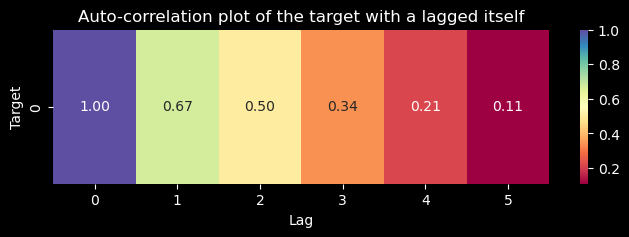

In [4]:
# create empty array to store the cross-correlation values for the target and lag up to lag=6
crosscorr = np.empty(6)
# Compute the cross-correlation for each label and lag up to 6
for i in range(6):
	crosscorr[i] = dataset_no_drift[target].corr(dataset_no_drift[target].shift(i))

# Plot the cross-correlation vector in a heatmap with the lag values on the x-axis
fig, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(crosscorr.reshape(1, 6), annot=True, fmt=".2f", cmap='Spectral', ax=ax)
ax.set_title("Auto-correlation plot of the target with a lagged itself")
ax.set_xlabel("Lag")
ax.set_ylabel("Target")
# add x and y ticks
ax.set_xticks(np.arange(6)+0.5)
ax.set_xticklabels(np.arange(6))

plt.show()



From the result of this plot, we can conclude that the label y is highly correlated with the lagged version of itself, but after 5 time steps, the auto-correlation becomes negligible. This result is expected since the formula for the computation of the binary label depends on the past labels up to 4 time steps in the past. We can also see that the values are particularly high compared to the other auto correlation plots

### Cross-correlation plot of the label with the current and past features

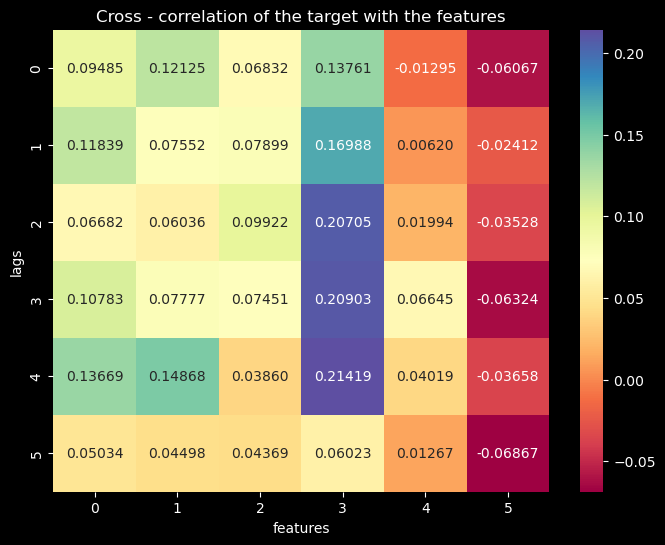

In [5]:
import seaborn as sns
import numpy as np

# create empty array to store the cross-correlation values for the target and lag up to lag=6
crosscorr = np.empty((len(features), 6))
# Compute the cross-correlation for each label and lag up to 6
for i, feature_x in enumerate(features):
	for j in range(6):
		crosscorr[i, j] = dataset_no_drift[target].corr(dataset_no_drift[feature_x].shift(j))

# Plot the cross-correlation vector in a heatmap with the features on the x-axis and the lag values on the y-axis
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(crosscorr.T, annot=True, fmt=".5f", cmap='Spectral', ax=ax)
ax.set_title("Cross - correlation of the target with the features")
ax.set_xlabel("features")
ax.set_ylabel("lags")

plt.show()

The plot above shows clearly that certain features are more correlated with the label than others. This result is expected since the formula for the computation of the label doesn't include all variables, but only 3: $x_0, x_1, x_3$

# Streaming Machine Learning models

Import all necessary functions from river library

In [42]:
# streaming dataset
from river.stream import iter_pandas
# metrics for model evaluation
from river.metrics import Accuracy, CohenKappa, F1, Recall, Precision
from river.metrics.base import Metrics
# prequential evaluation
from river.evaluate import iter_progressive_val_score
# classification models and ensembles
from river.tree import HoeffdingTreeClassifier, HoeffdingAdaptiveTreeClassifier
from river.ensemble import SRPClassifier, AdaptiveRandomForestClassifier
# base classifier for comparison
from river import naive_bayes
# import temporally augmented classifier
from temporally_augmented_classifier import TemporallyAugmentedClassifier

# import kappa temporal metric from kappa_t.py file
from kappa_t import CohenKappaTemporal

# rolling metrics
from river.utils import Rolling
from river.stats import Mean

import numpy as np


Functions used to plot the metrics of the models trainings over time

In [43]:
# extract a float number from a string, for example: "asd0.5sad" -> 0.5
def extract_float(string):
	string = str(string)
	number = float(''.join(ele for ele in string if ele.isdigit() or ele == '.' or ele == '-'))
	#if (number > 100):
		#number = number - 100.0

	return number / 100.0

# plot the results in a single plot, where each column values are plotted as a line
def plot_metrics(results):
	
	fig, ax = plt.subplots(figsize=(12, 8))
	
	for i in range(0, results.shape[1]):
		ax.set_ylim(-0.25, 1.25)
		ax.plot(results[50:, i], label=labels[i])

	ax.set_xlabel("Instances")
	ax.set_ylabel("Metric value")
	ax.set_title("Metrics")
	ax.legend()
	plt.show()



Progressive model evaluation function with all the metrics. It prints the metrics value during the training process, then saves the final metric values for further data visualization. The Rolling metric is used to get a rolling average of the metric value during the model online training.

In [44]:
def prequential_evaluation(datastream, model, metric):
    # initialize metrics wrapper Rolling from river 
	rolling_metric = Rolling(metric, window_size=500)

	# evaluate model
	metric_results = iter_progressive_val_score(dataset = datastream, model = model, metric = rolling_metric)

	# copy metric results as a typing generator into a numpy array
	# create an array of size (len(results), len(columns)) with the float values
	results = np.zeros(dataset_size[0])
	
	for i, element in enumerate(metric_results):
		#print(element)
		values_dict = np.array(list(element.values()))

		# print every 1000th element
		if ((i + 1) % 1000 == 0):
			# print element of the values dict separated by commas
			print(*values_dict, sep = ", ")
		
		# get the float values from the string values in the results array
		results[i] = [extract_float(x) for x in values_dict][0]

		'''
		# apply rolling metrics to values_dict
		for j in range(6):
			rolling_metrics[j].update(results[i, j])
			results[i, j] = rolling_metrics[j].get()
		'''

	return results

Models evaluation is done one metric at a time, because the River library doesn't support a Metrics object (list of metrics for model prequential evaluation) composed of Rollable objects (rolling metrics). That's why each model is trained 5 times (once per rolling metric).

In [45]:
def evaluate_model(drift_source, model):
	
	# initialize metrics
	metrics_list = [Accuracy(), CohenKappa(), CohenKappaTemporal(), Recall(), Precision()]
	metrics_result = np.empty((dataset_size[0], len(metrics_list)), dtype = float)

	if (drift_source == "features"):
		for i in range(len(metrics_list)):
			datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
			metrics_result[:, i] = prequential_evaluation(datastream, model, metrics_list[i])

	elif (drift_source == "labels"):
		for i in range(len(metrics_list)):
			datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
			metrics_result[:, i] = prequential_evaluation(datastream, model, metrics_list[i])
			
	elif (drift_source == "no_drift"):
		for i in range(len(metrics_list)):
			datastream = iter_pandas(X = dataset_no_drift[features], y = dataset_no_drift[target])
			metrics_result[:, i] = prequential_evaluation(datastream, model, metrics_list[i])

	plot_metrics(metrics_result)
	return metrics_result


Create a structure holding the final values for every model trained, every metric and each of the 3 datasets computed. This is used at the end of the notebook to show the final aggregated results.

In [46]:

# metrics list used in the evaluation
labels = ["Accuracy", "CohenKappa", "CohenKappaTemporal", "Recall", "Precision"]

# numpy array with depth 3, 5 columns and 10 rows
# each depth represents a different dataset
# each column represents a different metric
# each row represents a different training instance
scores = np.empty((7, len(labels), 3), dtype = float)

results = np.empty((dataset_size[0], len(labels)), dtype = float)

# Evaluation on the dataset with no concept drift and base learners

Comparison with baseline model gaussian naive bayes

Accuracy: 84.80%, 1000
Accuracy: 78.80%, 2000
Accuracy: 84.20%, 3000
Accuracy: 80.80%, 4000
Accuracy: 84.40%, 5000
Accuracy: 83.20%, 6000
Accuracy: 83.80%, 7000
Accuracy: 84.40%, 8000
Accuracy: 82.00%, 9000
Accuracy: 85.00%, 10000
Accuracy: 82.40%, 11000
Accuracy: 82.00%, 12000
Accuracy: 81.20%, 13000
Accuracy: 83.60%, 14000
Accuracy: 75.20%, 15000
Accuracy: 80.40%, 16000
Accuracy: 78.80%, 17000
Accuracy: 79.20%, 18000
Accuracy: 86.00%, 19000
Accuracy: 83.80%, 20000
CohenKappa: 2.35%, 1000
CohenKappa: 1.50%, 2000
CohenKappa: 2.08%, 3000
CohenKappa: 0.89%, 4000
CohenKappa: -0.40%, 5000
CohenKappa: 1.94%, 6000
CohenKappa: -0.40%, 7000
CohenKappa: 0.00%, 8000
CohenKappa: -0.79%, 9000
CohenKappa: 0.00%, 10000
CohenKappa: 1.83%, 11000
CohenKappa: 0.00%, 12000
CohenKappa: 1.29%, 13000
CohenKappa: 0.00%, 14000
CohenKappa: 1.20%, 15000
CohenKappa: 0.00%, 16000
CohenKappa: 0.00%, 17000
CohenKappa: 0.00%, 18000
CohenKappa: 0.00%, 19000
CohenKappa: 0.00%, 20000
CohenKappaTemporal: 117.75%, 1000
C

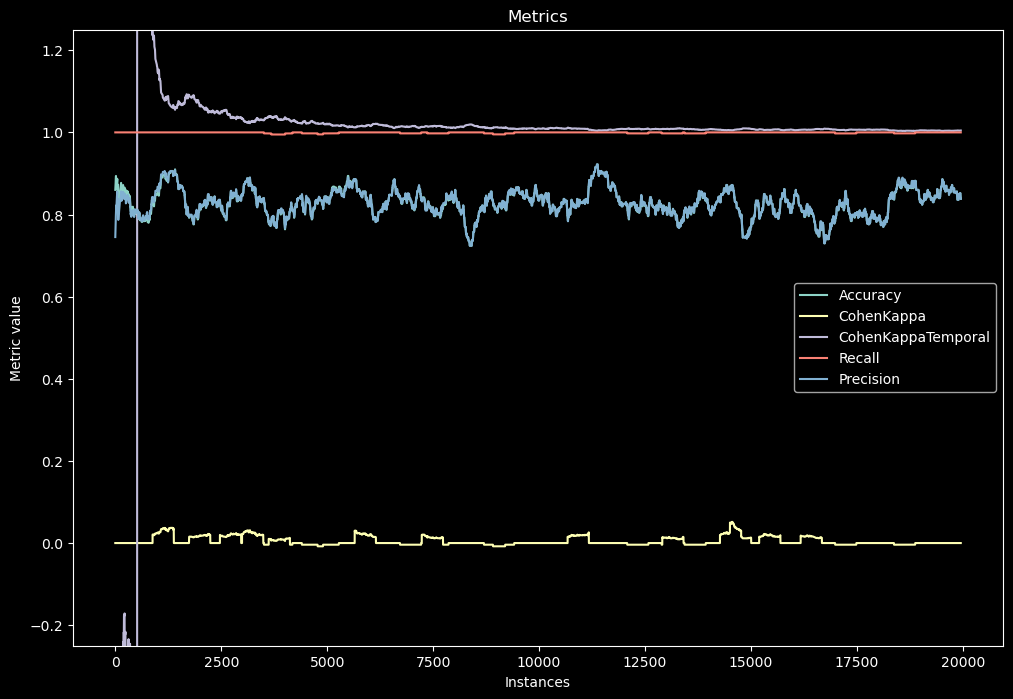

final scores saved for this run:  {'Accuracy': 0.838, 'CohenKappa': 0.0, 'CohenKappaTemporal': 1.0046, 'Recall': 1.0, 'Precision': 0.838}


In [47]:
model = naive_bayes.GaussianNB()

results = evaluate_model(drift_source="no_drift", model=model)

# save final results to numpy array
scores[0, :, 0] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[0, :, 0]))
print("final scores saved for this run: ", final_score)

Using a hoeffding tree classifier for the dataset

Accuracy: 85.20%, 1000
Accuracy: 79.00%, 2000
Accuracy: 84.00%, 3000
Accuracy: 81.60%, 4000
Accuracy: 84.80%, 5000
Accuracy: 82.40%, 6000
Accuracy: 84.00%, 7000
Accuracy: 84.60%, 8000
Accuracy: 82.20%, 9000
Accuracy: 85.00%, 10000
Accuracy: 82.20%, 11000
Accuracy: 82.00%, 12000
Accuracy: 81.00%, 13000
Accuracy: 83.60%, 14000
Accuracy: 75.00%, 15000
Accuracy: 80.40%, 16000
Accuracy: 78.80%, 17000
Accuracy: 79.00%, 18000
Accuracy: 86.00%, 19000
Accuracy: 83.40%, 20000
CohenKappa: 0.00%, 1000
CohenKappa: 6.22%, 2000
CohenKappa: 2.47%, 3000
CohenKappa: -1.18%, 4000
CohenKappa: 0.00%, 5000
CohenKappa: 0.00%, 6000
CohenKappa: 0.00%, 7000
CohenKappa: 0.00%, 8000
CohenKappa: 0.00%, 9000
CohenKappa: 0.00%, 10000
CohenKappa: 0.00%, 11000
CohenKappa: -0.79%, 12000
CohenKappa: 0.00%, 13000
CohenKappa: -0.40%, 14000
CohenKappa: 0.00%, 15000
CohenKappa: -1.18%, 16000
CohenKappa: 0.00%, 17000
CohenKappa: -1.18%, 18000
CohenKappa: 2.43%, 19000
CohenKappa: -0.79%, 20000
CohenKappaTemporal: 118.25%, 100

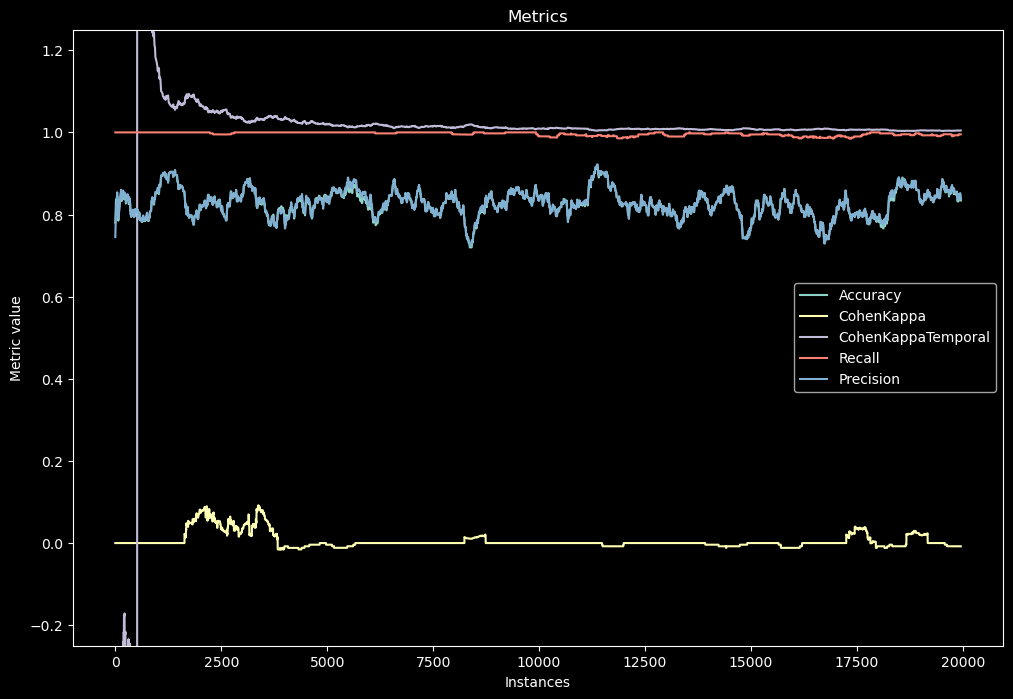

final scores saved for this run:  {'Accuracy': 0.8340000000000001, 'CohenKappa': -0.0079, 'CohenKappaTemporal': 1.0046, 'Recall': 0.9952, 'Precision': 0.838}


In [48]:
model = HoeffdingTreeClassifier()
results = evaluate_model(drift_source="no_drift", model=model)

# save final results to numpy array
scores[1, :, 0] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[1, :, 0]))
print("final scores saved for this run: ", final_score)

Use temporal augmentation with the hoeffding tree classifier, adding only old labels

Accuracy: 89.60%, 1000
Accuracy: 91.00%, 2000
Accuracy: 92.80%, 3000
Accuracy: 91.80%, 4000
Accuracy: 90.60%, 5000
Accuracy: 90.80%, 6000
Accuracy: 90.20%, 7000
Accuracy: 89.60%, 8000
Accuracy: 91.20%, 9000
Accuracy: 92.40%, 10000
Accuracy: 90.40%, 11000
Accuracy: 91.20%, 12000
Accuracy: 92.40%, 13000
Accuracy: 92.40%, 14000
Accuracy: 91.20%, 15000
Accuracy: 91.40%, 16000
Accuracy: 92.00%, 17000
Accuracy: 93.20%, 18000
Accuracy: 90.40%, 19000
Accuracy: 89.40%, 20000
CohenKappa: 66.46%, 1000
CohenKappa: 70.63%, 2000
CohenKappa: 70.22%, 3000
CohenKappa: 73.71%, 4000
CohenKappa: 65.12%, 5000
CohenKappa: 63.60%, 6000
CohenKappa: 62.38%, 7000
CohenKappa: 59.79%, 8000
CohenKappa: 67.38%, 9000
CohenKappa: 68.83%, 10000
CohenKappa: 63.80%, 11000
CohenKappa: 67.69%, 12000
CohenKappa: 72.69%, 13000
CohenKappa: 68.39%, 14000
CohenKappa: 75.62%, 15000
CohenKappa: 71.04%, 16000
CohenKappa: 73.11%, 17000
CohenKappa: 71.47%, 18000
CohenKappa: 58.56%, 19000
CohenKappa: 62.60%, 20000
CohenKappaTemporal

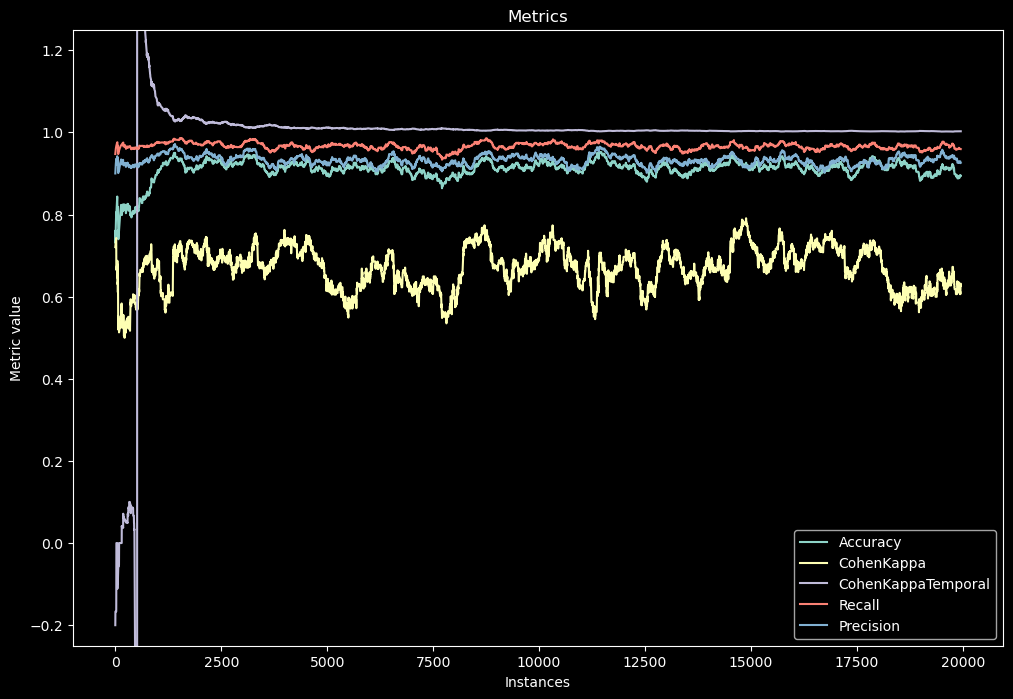

final scores saved for this run:  {'Accuracy': 0.894, 'CohenKappa': 0.626, 'CohenKappaTemporal': 1.0027, 'Recall': 0.9594, 'Precision': 0.9259000000000001}


In [49]:
# crate hoeffding tree classifier model using temporally augmented classifier as base learner
model = TemporallyAugmentedClassifier(base_learner=HoeffdingTreeClassifier(), num_old_labels=5, num_old_features=0)

results = evaluate_model(drift_source="no_drift", model=model)

# save final results to numpy array
scores[2, :, 0] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[2, :, 0]))
print("final scores saved for this run: ", final_score)

Use temporal augmentation with the hoeffding tree classifier, adding old labels and old features

Accuracy: 90.20%, 1000
Accuracy: 90.40%, 2000
Accuracy: 93.20%, 3000
Accuracy: 92.20%, 4000
Accuracy: 90.80%, 5000
Accuracy: 91.20%, 6000
Accuracy: 92.20%, 7000
Accuracy: 90.20%, 8000
Accuracy: 91.20%, 9000
Accuracy: 93.00%, 10000
Accuracy: 90.20%, 11000
Accuracy: 92.00%, 12000
Accuracy: 91.80%, 13000
Accuracy: 92.20%, 14000
Accuracy: 91.80%, 15000
Accuracy: 91.00%, 16000
Accuracy: 93.00%, 17000
Accuracy: 92.80%, 18000
Accuracy: 93.00%, 19000
Accuracy: 90.60%, 20000
CohenKappa: 66.21%, 1000
CohenKappa: 69.65%, 2000
CohenKappa: 73.35%, 3000
CohenKappa: 73.83%, 4000
CohenKappa: 68.29%, 5000
CohenKappa: 66.63%, 6000
CohenKappa: 65.38%, 7000
CohenKappa: 68.97%, 8000
CohenKappa: 72.75%, 9000
CohenKappa: 71.77%, 10000
CohenKappa: 69.95%, 11000
CohenKappa: 71.20%, 12000
CohenKappa: 81.80%, 13000
CohenKappa: 70.24%, 14000
CohenKappa: 76.15%, 15000
CohenKappa: 71.19%, 16000
CohenKappa: 73.96%, 17000
CohenKappa: 74.68%, 18000
CohenKappa: 65.55%, 19000
CohenKappa: 67.52%, 20000
CohenKappaTemporal

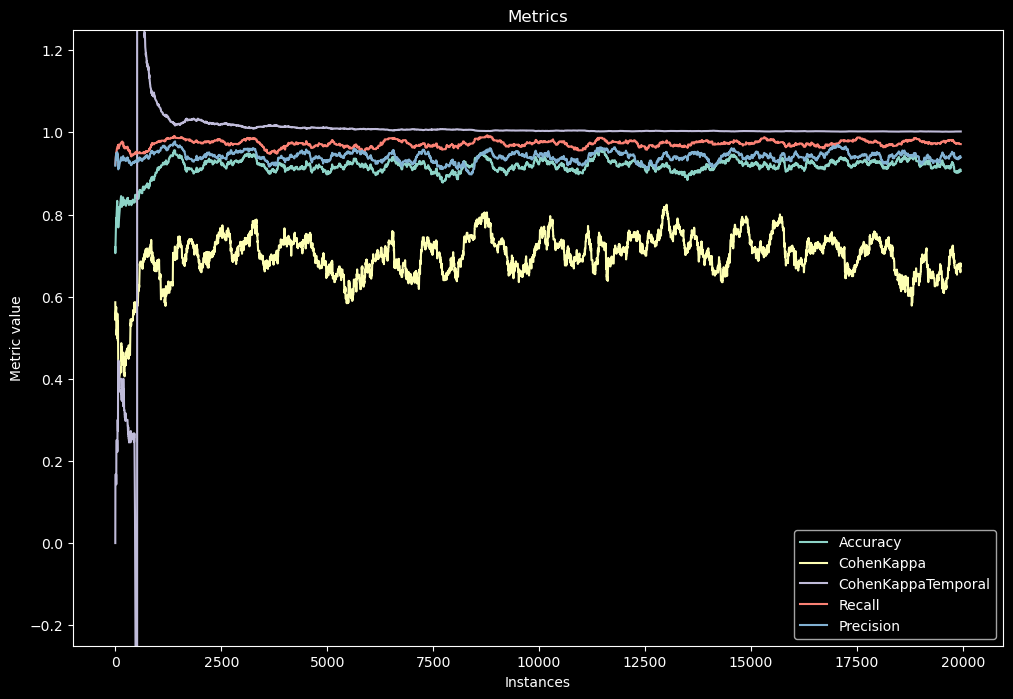

final scores saved for this run:  {'Accuracy': 0.9059999999999999, 'CohenKappa': 0.6751999999999999, 'CohenKappaTemporal': 1.0022, 'Recall': 0.9714, 'Precision': 0.9390999999999999}


In [50]:
# crate hoeffding tree classifier model using temporally augmented classifier as base learner
model = TemporallyAugmentedClassifier(base_learner=HoeffdingTreeClassifier(), num_old_labels=5, num_old_features=5)

results = evaluate_model(drift_source="no_drift", model=model)

# save final results to numpy array
scores[3, :, 0] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[3, :, 0]))
print("final scores saved for this run: ", final_score)

These results were expected, in fact the temporal augmentation works well and contributes to increase the classification accuracy of the model. Also, we can see that since the accuracy and the other metrics remain stable over time, there is no evidence of a concept drift happening in the training

# Streaming Machine Learning models on datasets with concept drift

## Evaluation on the dataset with concept drift in the features definition

Comparison with naive bayes model as baseline model

Accuracy: 69.20%, 1000
Accuracy: 68.20%, 2000
Accuracy: 73.40%, 3000
Accuracy: 59.60%, 4000
Accuracy: 71.80%, 5000
Accuracy: 67.40%, 6000
Accuracy: 70.80%, 7000
Accuracy: 66.00%, 8000
Accuracy: 65.00%, 9000
Accuracy: 64.20%, 10000
Accuracy: 67.60%, 11000
Accuracy: 69.40%, 12000
Accuracy: 65.40%, 13000
Accuracy: 70.40%, 14000
Accuracy: 60.40%, 15000
Accuracy: 73.60%, 16000
Accuracy: 68.40%, 17000
Accuracy: 65.00%, 18000
Accuracy: 70.00%, 19000
Accuracy: 74.80%, 20000
CohenKappa: 5.09%, 1000
CohenKappa: 10.48%, 2000
CohenKappa: 18.28%, 3000
CohenKappa: 10.06%, 4000
CohenKappa: 14.67%, 5000
CohenKappa: 16.04%, 6000
CohenKappa: 10.28%, 7000
CohenKappa: 17.72%, 8000
CohenKappa: 15.38%, 9000
CohenKappa: 11.52%, 10000
CohenKappa: 15.29%, 11000
CohenKappa: 16.80%, 12000
CohenKappa: 10.80%, 13000
CohenKappa: 16.60%, 14000
CohenKappa: 10.11%, 15000
CohenKappa: 17.82%, 16000
CohenKappa: 8.53%, 17000
CohenKappa: 14.40%, 18000
CohenKappa: 15.77%, 19000
CohenKappa: 19.19%, 20000
CohenKappaTemporal: 

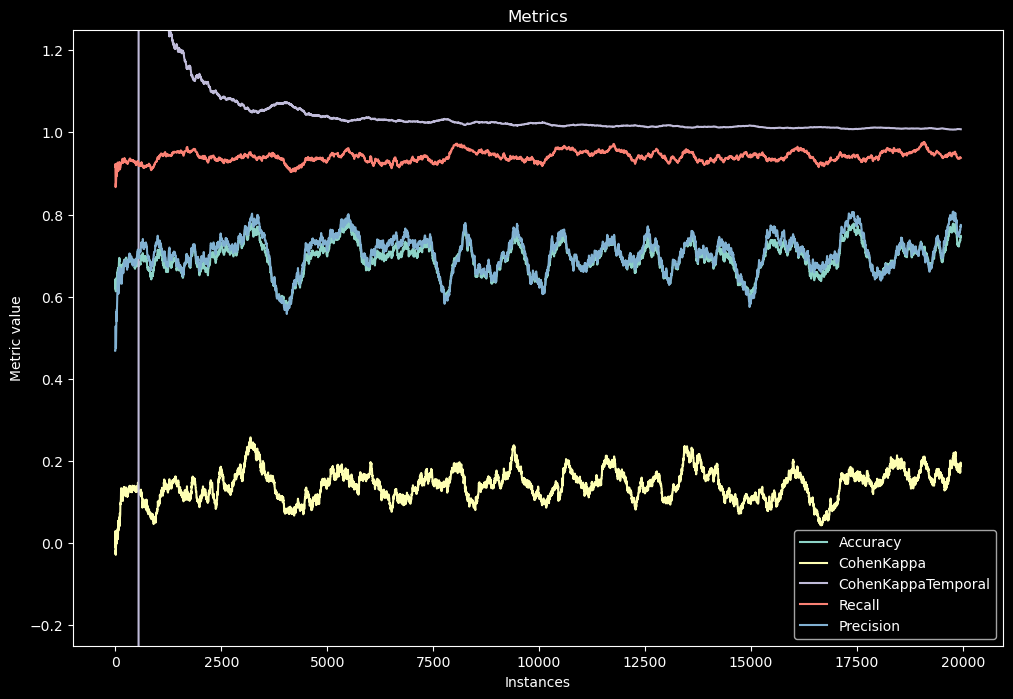

final scores saved for this run:  {'Accuracy': 0.748, 'CohenKappa': 0.19190000000000002, 'CohenKappaTemporal': 1.0076, 'Recall': 0.9378, 'Precision': 0.7746}


In [51]:
model = naive_bayes.GaussianNB()

results = evaluate_model(drift_source="features", model=model)

# save final results to numpy array
scores[0, :, 1] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[0, :, 1]))
print("final scores saved for this run: ", final_score)

Hoeffding tree classifier

Accuracy: 69.20%, 1000
Accuracy: 68.20%, 2000
Accuracy: 73.40%, 3000
Accuracy: 56.80%, 4000
Accuracy: 72.40%, 5000
Accuracy: 68.20%, 6000
Accuracy: 71.60%, 7000
Accuracy: 60.00%, 8000
Accuracy: 62.80%, 9000
Accuracy: 62.60%, 10000
Accuracy: 66.80%, 11000
Accuracy: 69.00%, 12000
Accuracy: 64.60%, 13000
Accuracy: 70.60%, 14000
Accuracy: 57.40%, 15000
Accuracy: 72.40%, 16000
Accuracy: 67.00%, 17000
Accuracy: 64.60%, 18000
Accuracy: 69.60%, 19000
Accuracy: 74.60%, 20000
CohenKappa: 11.42%, 1000
CohenKappa: 7.12%, 2000
CohenKappa: 16.30%, 3000
CohenKappa: 11.43%, 4000
CohenKappa: 14.63%, 5000
CohenKappa: 9.55%, 6000
CohenKappa: 2.79%, 7000
CohenKappa: 9.46%, 8000
CohenKappa: 12.52%, 9000
CohenKappa: 6.71%, 10000
CohenKappa: 13.85%, 11000
CohenKappa: 18.18%, 12000
CohenKappa: 12.10%, 13000
CohenKappa: 19.98%, 14000
CohenKappa: 11.52%, 15000
CohenKappa: 14.14%, 16000
CohenKappa: 9.67%, 17000
CohenKappa: 16.69%, 18000
CohenKappa: 13.09%, 19000
CohenKappa: 13.53%, 20000
CohenKappaTemporal: 143.

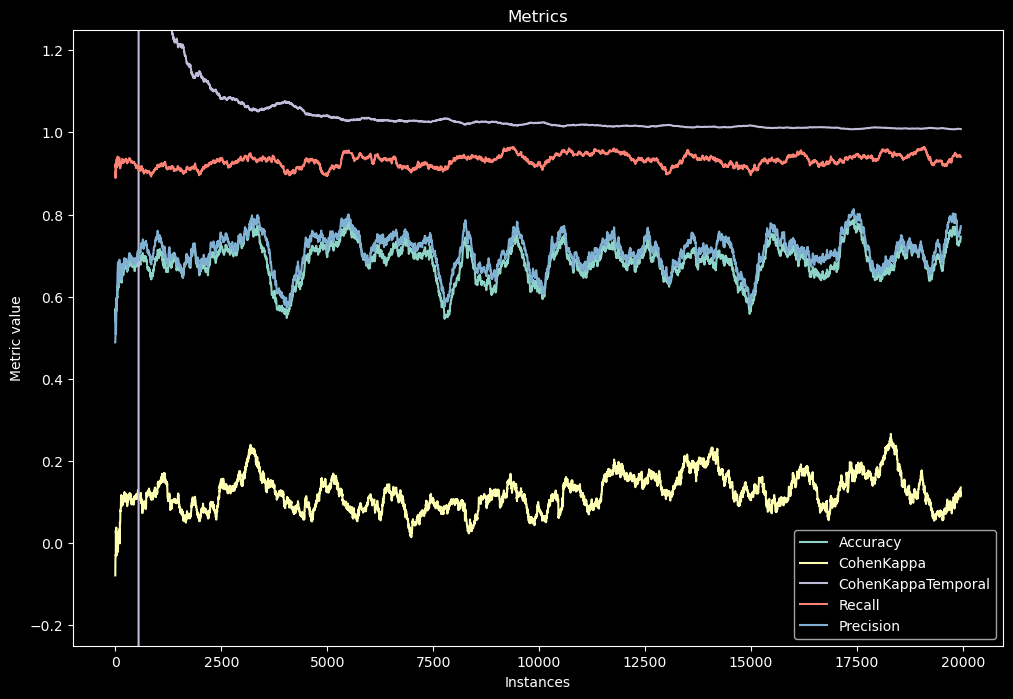

final scores saved for this run:  {'Accuracy': 0.746, 'CohenKappa': 0.1353, 'CohenKappaTemporal': 1.0081, 'Recall': 0.9405, 'Precision': 0.7717}


In [52]:

model = HoeffdingTreeClassifier()

results = evaluate_model(drift_source="features", model=model)

# save final results to numpy array
scores[1, :, 1] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[1, :, 1]))
print("final scores saved for this run: ", final_score)

Accuracy: 70.60%, 1000
Accuracy: 66.80%, 2000
Accuracy: 70.40%, 3000
Accuracy: 56.40%, 4000
Accuracy: 69.80%, 5000
Accuracy: 66.00%, 6000
Accuracy: 71.20%, 7000
Accuracy: 63.60%, 8000
Accuracy: 64.80%, 9000
Accuracy: 63.40%, 10000
Accuracy: 65.80%, 11000
Accuracy: 67.00%, 12000
Accuracy: 65.00%, 13000
Accuracy: 68.60%, 14000
Accuracy: 60.20%, 15000
Accuracy: 71.40%, 16000
Accuracy: 65.00%, 17000
Accuracy: 64.80%, 18000
Accuracy: 69.00%, 19000
Accuracy: 74.60%, 20000
CohenKappa: 5.25%, 1000
CohenKappa: 6.83%, 2000
CohenKappa: 10.69%, 3000
CohenKappa: 8.58%, 4000
CohenKappa: 2.91%, 5000
CohenKappa: -0.40%, 6000
CohenKappa: -0.58%, 7000
CohenKappa: 7.61%, 8000
CohenKappa: 17.86%, 9000
CohenKappa: 10.38%, 10000
CohenKappa: 15.22%, 11000
CohenKappa: 12.21%, 12000
CohenKappa: 16.37%, 13000
CohenKappa: 17.88%, 14000
CohenKappa: 7.02%, 15000
CohenKappa: 21.48%, 16000
CohenKappa: 8.55%, 17000
CohenKappa: 14.52%, 18000
CohenKappa: 15.47%, 19000
CohenKappa: 19.98%, 20000
CohenKappaTemporal: 143.0

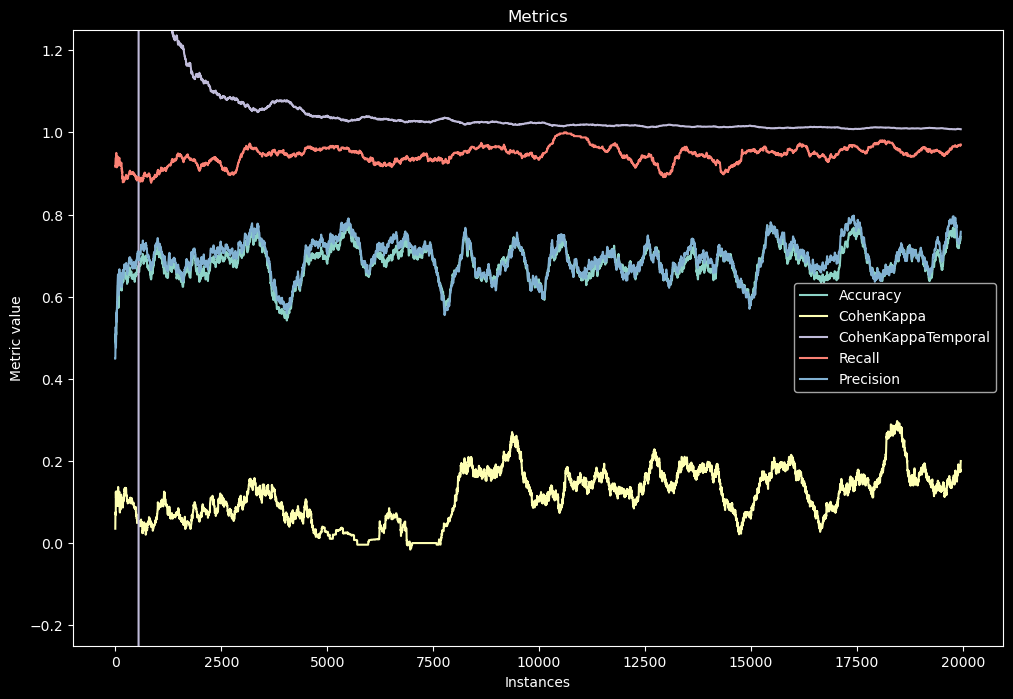

final scores saved for this run:  {'Accuracy': 0.746, 'CohenKappa': 0.1998, 'CohenKappaTemporal': 1.0078, 'Recall': 0.9703, 'Precision': 0.7581}


In [53]:

model = HoeffdingAdaptiveTreeClassifier()
results = evaluate_model(drift_source="features", model=model)

# save final results to numpy array
scores[2, :, 1] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[2, :, 1]))
print("final scores saved for this run: ", final_score)


Using temporal augmentation adding only old labels to the feature set

Accuracy: 85.60%, 1000
Accuracy: 86.40%, 2000
Accuracy: 86.80%, 3000
Accuracy: 81.80%, 4000
Accuracy: 86.80%, 5000
Accuracy: 81.80%, 6000
Accuracy: 84.00%, 7000
Accuracy: 86.20%, 8000
Accuracy: 83.80%, 9000
Accuracy: 84.40%, 10000
Accuracy: 83.20%, 11000
Accuracy: 84.40%, 12000
Accuracy: 84.20%, 13000
Accuracy: 85.80%, 14000
Accuracy: 85.60%, 15000
Accuracy: 87.80%, 16000
Accuracy: 86.60%, 17000
Accuracy: 86.00%, 18000
Accuracy: 85.00%, 19000
Accuracy: 88.20%, 20000
CohenKappa: 63.29%, 1000
CohenKappa: 67.01%, 2000
CohenKappa: 64.56%, 3000
CohenKappa: 64.11%, 4000
CohenKappa: 65.15%, 5000
CohenKappa: 60.51%, 6000
CohenKappa: 56.16%, 7000
CohenKappa: 72.63%, 8000
CohenKappa: 66.47%, 9000
CohenKappa: 70.78%, 10000
CohenKappa: 67.63%, 11000
CohenKappa: 65.54%, 12000
CohenKappa: 67.43%, 13000
CohenKappa: 68.80%, 14000
CohenKappa: 70.80%, 15000
CohenKappa: 70.69%, 16000
CohenKappa: 67.88%, 17000
CohenKappa: 71.43%, 18000
CohenKappa: 67.03%, 19000
CohenKappa: 67.73%, 20000
CohenKappaTemporal

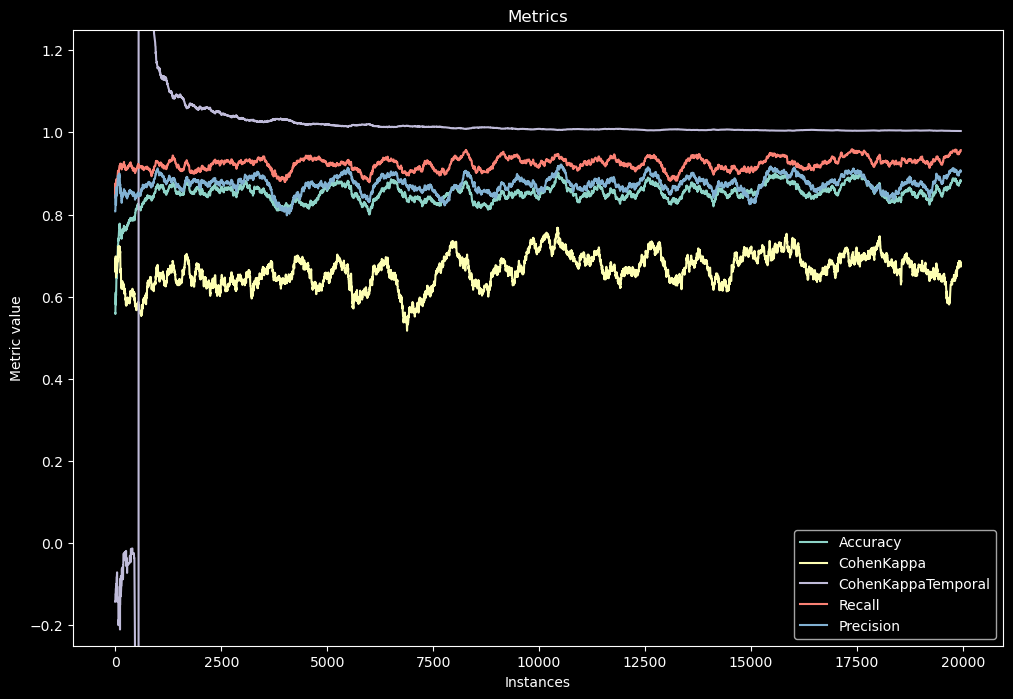

final scores saved for this run:  {'Accuracy': 0.882, 'CohenKappa': 0.6773, 'CohenKappaTemporal': 1.0034, 'Recall': 0.9568000000000001, 'Precision': 0.9041}


In [54]:

model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5, num_old_features=0)
results = evaluate_model(drift_source="features", model=model)

# save final results to numpy array
scores[3, :, 1] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[3, :, 1]))
print("final scores saved for this run: ", final_score)

Using temporal augmentation adding old labels and old features to the feature set

Accuracy: 86.40%, 1000
Accuracy: 89.40%, 2000
Accuracy: 91.20%, 3000
Accuracy: 84.40%, 4000
Accuracy: 89.60%, 5000
Accuracy: 85.20%, 6000
Accuracy: 86.60%, 7000
Accuracy: 88.40%, 8000
Accuracy: 85.00%, 9000
Accuracy: 89.20%, 10000
Accuracy: 88.40%, 11000
Accuracy: 88.60%, 12000
Accuracy: 88.20%, 13000
Accuracy: 89.60%, 14000
Accuracy: 86.00%, 15000
Accuracy: 89.60%, 16000
Accuracy: 87.60%, 17000
Accuracy: 88.20%, 18000
Accuracy: 87.00%, 19000
Accuracy: 90.20%, 20000
CohenKappa: 73.08%, 1000
CohenKappa: 76.68%, 2000
CohenKappa: 73.34%, 3000
CohenKappa: 63.57%, 4000
CohenKappa: 75.18%, 5000
CohenKappa: 65.36%, 6000
CohenKappa: 61.64%, 7000
CohenKappa: 78.21%, 8000
CohenKappa: 69.19%, 9000
CohenKappa: 74.52%, 10000
CohenKappa: 69.75%, 11000
CohenKappa: 72.13%, 12000
CohenKappa: 75.06%, 13000
CohenKappa: 78.09%, 14000
CohenKappa: 77.68%, 15000
CohenKappa: 77.83%, 16000
CohenKappa: 74.75%, 17000
CohenKappa: 76.82%, 18000
CohenKappa: 72.18%, 19000
CohenKappa: 67.57%, 20000
CohenKappaTemporal

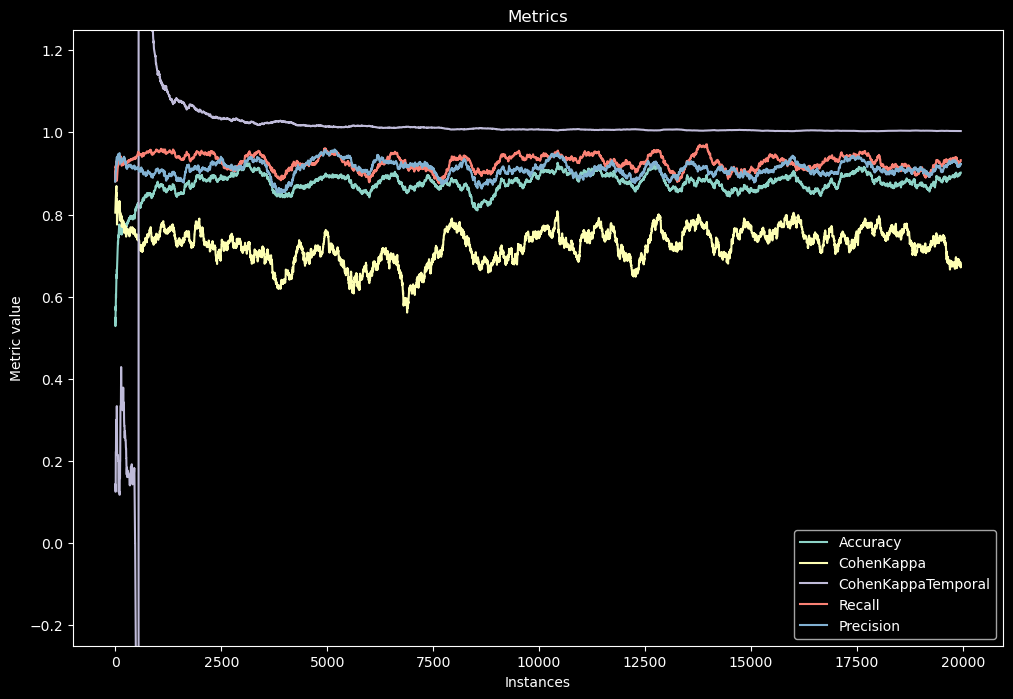

final scores saved for this run:  {'Accuracy': 0.902, 'CohenKappa': 0.6757, 'CohenKappaTemporal': 1.0033, 'Recall': 0.9323999999999999, 'Precision': 0.9220999999999999}


In [55]:

model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5, num_old_features=5)
results = evaluate_model(drift_source="features", model=model)

# save final results to numpy array
scores[4, :, 1] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[4, :, 1]))
print("final scores saved for this run: ", final_score)

**Apparent absence of concept drift**:

The plots above do not show a clear drop in the accuracy of the trained models, nor the other metrics tested show any significant change in their values. It appears that the dataset with concept drift in the features definition doesn't actually exhibit a concept drift. This is not true, because the concept drift exists, but cannot be "seen" by the model.

Many test were conducted and their analysis is described in depth at the end of this notebook.

## Evaluation on the dataset with concept drift in the labeling function

Comparison with naive bayes model

Accuracy: 85.80%, 1000
Accuracy: 79.00%, 2000
Accuracy: 83.20%, 3000
Accuracy: 87.20%, 4000
Accuracy: 86.20%, 5000
Accuracy: 84.00%, 6000
Accuracy: 83.80%, 7000
Accuracy: 86.20%, 8000
Accuracy: 90.80%, 9000
Accuracy: 76.40%, 10000
Accuracy: 27.80%, 11000
Accuracy: 33.60%, 12000
Accuracy: 30.60%, 13000
Accuracy: 27.40%, 14000
Accuracy: 30.40%, 15000
Accuracy: 29.60%, 16000
Accuracy: 38.40%, 17000
Accuracy: 46.40%, 18000
Accuracy: 47.20%, 19000
Accuracy: 53.00%, 20000
CohenKappa: 6.09%, 1000
CohenKappa: 0.56%, 2000
CohenKappa: -0.16%, 3000
CohenKappa: 7.46%, 4000
CohenKappa: 3.30%, 5000
CohenKappa: 12.93%, 6000
CohenKappa: 7.24%, 7000
CohenKappa: 2.17%, 8000
CohenKappa: 11.14%, 9000
CohenKappa: 5.10%, 10000
CohenKappa: 2.83%, 11000
CohenKappa: 4.78%, 12000
CohenKappa: 7.41%, 13000
CohenKappa: 10.68%, 14000
CohenKappa: 12.56%, 15000
CohenKappa: 12.56%, 16000
CohenKappa: 15.94%, 17000
CohenKappa: 21.01%, 18000
CohenKappa: 18.23%, 19000
CohenKappa: 21.60%, 20000
CohenKappaTemporal: 138.64%,

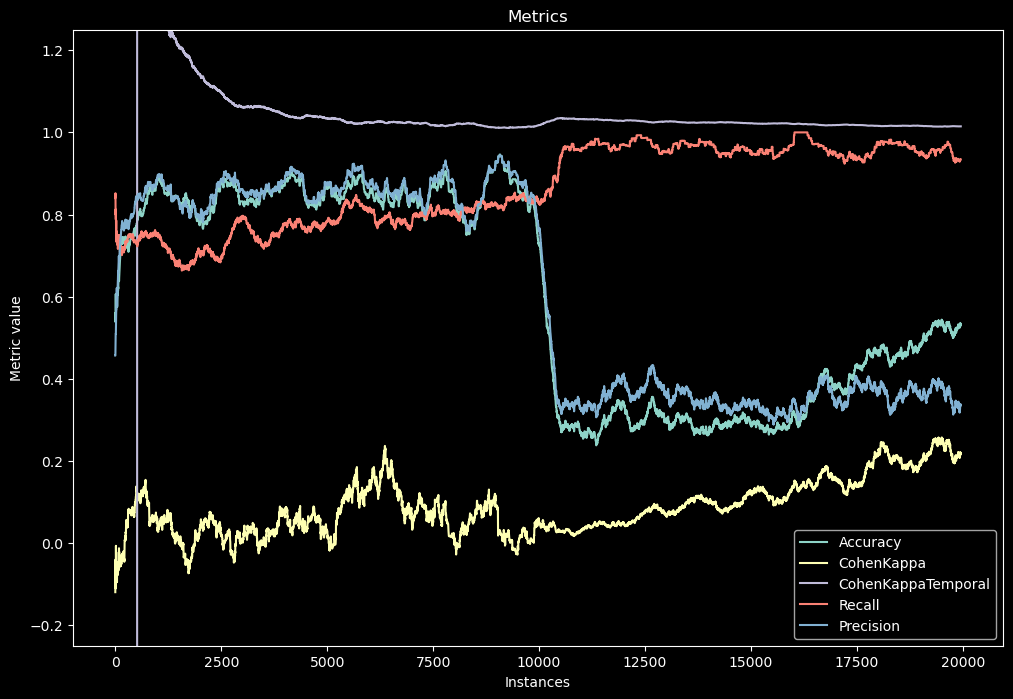

final scores saved for this run:  {'Accuracy': 0.53, 'CohenKappa': 0.21600000000000003, 'CohenKappaTemporal': 1.0147, 'Recall': 0.9339, 'Precision': 0.33630000000000004}


In [56]:
model = naive_bayes.GaussianNB()

results = evaluate_model(drift_source="labels", model=model)

# save final results to numpy array
scores[0, :, 2] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[0, :, 2]))
print("final scores saved for this run: ", final_score)

Hoeffding Tree classifier

Accuracy: 85.80%, 1000
Accuracy: 79.40%, 2000
Accuracy: 83.20%, 3000
Accuracy: 87.20%, 4000
Accuracy: 86.40%, 5000
Accuracy: 83.60%, 6000
Accuracy: 83.80%, 7000
Accuracy: 86.20%, 8000
Accuracy: 90.80%, 9000
Accuracy: 76.40%, 10000
Accuracy: 36.80%, 11000
Accuracy: 47.40%, 12000
Accuracy: 53.40%, 13000
Accuracy: 56.80%, 14000
Accuracy: 55.40%, 15000
Accuracy: 62.20%, 16000
Accuracy: 77.80%, 17000
Accuracy: 74.60%, 18000
Accuracy: 72.00%, 19000
Accuracy: 76.60%, 20000
CohenKappa: 3.81%, 1000
CohenKappa: 2.32%, 2000
CohenKappa: 3.17%, 3000
CohenKappa: 0.15%, 4000
CohenKappa: 3.56%, 5000
CohenKappa: 8.79%, 6000
CohenKappa: 3.49%, 7000
CohenKappa: 7.15%, 8000
CohenKappa: 4.08%, 9000
CohenKappa: 8.36%, 10000
CohenKappa: 13.18%, 11000
CohenKappa: 13.73%, 12000
CohenKappa: 25.93%, 13000
CohenKappa: 24.89%, 14000
CohenKappa: 22.54%, 15000
CohenKappa: 28.82%, 16000
CohenKappa: 29.02%, 17000
CohenKappa: 34.08%, 18000
CohenKappa: 31.75%, 19000
CohenKappa: 35.03%, 20000
CohenKappaTemporal: 157.32%,

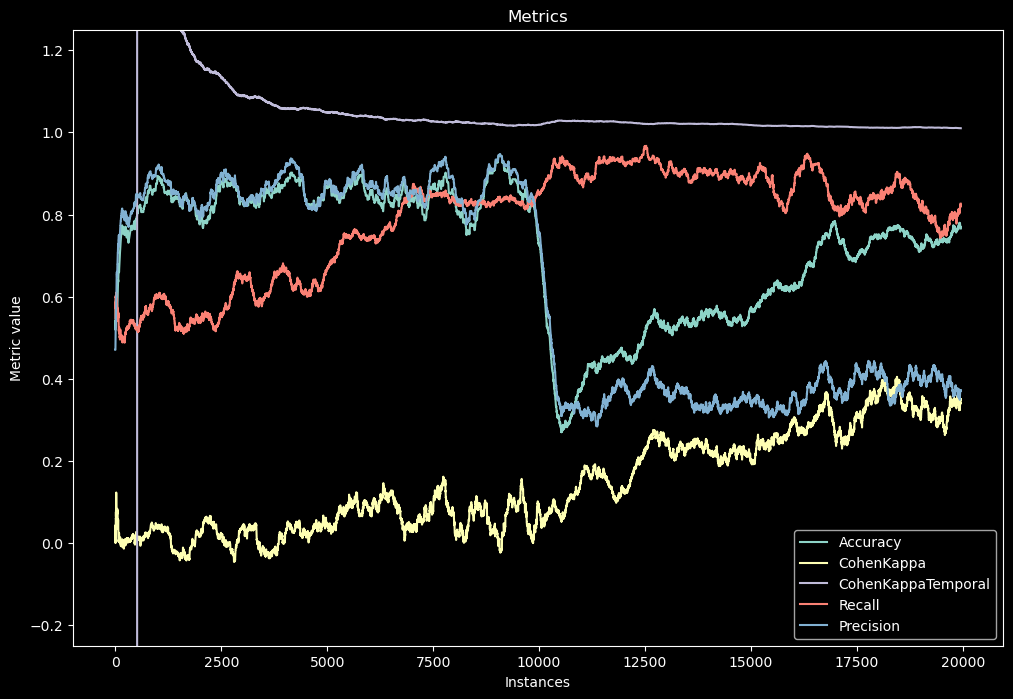

final scores saved for this run:  {'Accuracy': 0.7659999999999999, 'CohenKappa': 0.3503, 'CohenKappaTemporal': 1.0101, 'Recall': 0.8264, 'Precision': 0.37170000000000003}


In [57]:

model = HoeffdingTreeClassifier()

results = evaluate_model(drift_source="labels", model=model)

# save final results to numpy array
scores[1, :, 2] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[1, :, 2]))
print("final scores saved for this run: ", final_score)

Accuracy: 85.80%, 1000
Accuracy: 79.40%, 2000
Accuracy: 82.80%, 3000
Accuracy: 87.20%, 4000
Accuracy: 86.00%, 5000
Accuracy: 84.00%, 6000
Accuracy: 83.80%, 7000
Accuracy: 86.20%, 8000
Accuracy: 90.60%, 9000
Accuracy: 76.00%, 10000
Accuracy: 76.20%, 11000
Accuracy: 74.00%, 12000
Accuracy: 73.20%, 13000
Accuracy: 79.00%, 14000
Accuracy: 76.00%, 15000
Accuracy: 79.80%, 16000
Accuracy: 80.20%, 17000
Accuracy: 78.80%, 18000
Accuracy: 76.20%, 19000
Accuracy: 77.60%, 20000
CohenKappa: -1.71%, 1000
CohenKappa: 0.00%, 2000
CohenKappa: 0.00%, 3000
CohenKappa: -0.78%, 4000
CohenKappa: 0.00%, 5000
CohenKappa: -0.79%, 6000
CohenKappa: 0.00%, 7000
CohenKappa: 0.00%, 8000
CohenKappa: 0.00%, 9000
CohenKappa: 2.16%, 10000
CohenKappa: 35.00%, 11000
CohenKappa: 38.46%, 12000
CohenKappa: 38.20%, 13000
CohenKappa: 32.59%, 14000
CohenKappa: 30.37%, 15000
CohenKappa: 28.98%, 16000
CohenKappa: 32.02%, 17000
CohenKappa: 46.09%, 18000
CohenKappa: 26.45%, 19000
CohenKappa: 34.46%, 20000
CohenKappaTemporal: 117.6

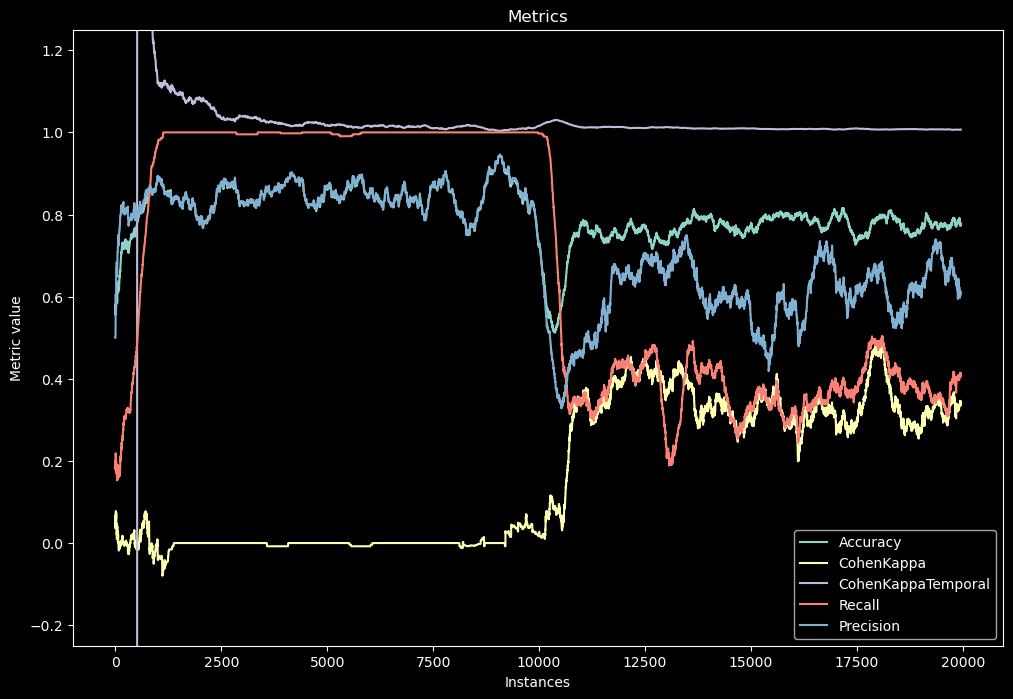

final scores saved for this run:  {'Accuracy': 0.7759999999999999, 'CohenKappa': 0.3446, 'CohenKappaTemporal': 1.0069, 'Recall': 0.4132, 'Precision': 0.6053000000000001}


In [58]:

model = HoeffdingAdaptiveTreeClassifier()
results = evaluate_model(drift_source="labels", model=model)

# save final results to numpy array
scores[2, :, 2] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[2, :, 2]))
print("final scores saved for this run: ", final_score)

Using temporal augmentation to add only old labels to the features set

Accuracy: 89.60%, 1000
Accuracy: 87.60%, 2000
Accuracy: 90.60%, 3000
Accuracy: 92.40%, 4000
Accuracy: 92.00%, 5000
Accuracy: 91.80%, 6000
Accuracy: 90.80%, 7000
Accuracy: 91.00%, 8000
Accuracy: 95.20%, 9000
Accuracy: 79.40%, 10000
Accuracy: 71.20%, 11000
Accuracy: 65.40%, 12000
Accuracy: 74.00%, 13000
Accuracy: 79.40%, 14000
Accuracy: 75.60%, 15000
Accuracy: 79.00%, 16000
Accuracy: 77.00%, 17000
Accuracy: 81.80%, 18000
Accuracy: 79.00%, 19000
Accuracy: 80.00%, 20000
CohenKappa: 52.45%, 1000
CohenKappa: 47.25%, 2000
CohenKappa: 67.09%, 3000
CohenKappa: 65.44%, 4000
CohenKappa: 63.71%, 5000
CohenKappa: 66.00%, 6000
CohenKappa: 63.58%, 7000
CohenKappa: 65.31%, 8000
CohenKappa: 64.74%, 9000
CohenKappa: 37.96%, 10000
CohenKappa: 38.22%, 11000
CohenKappa: 33.36%, 12000
CohenKappa: 48.54%, 13000
CohenKappa: 56.34%, 14000
CohenKappa: 44.47%, 15000
CohenKappa: 36.30%, 16000
CohenKappa: 33.23%, 17000
CohenKappa: 52.02%, 18000
CohenKappa: 43.56%, 19000
CohenKappa: 39.10%, 20000
CohenKappaTemporal

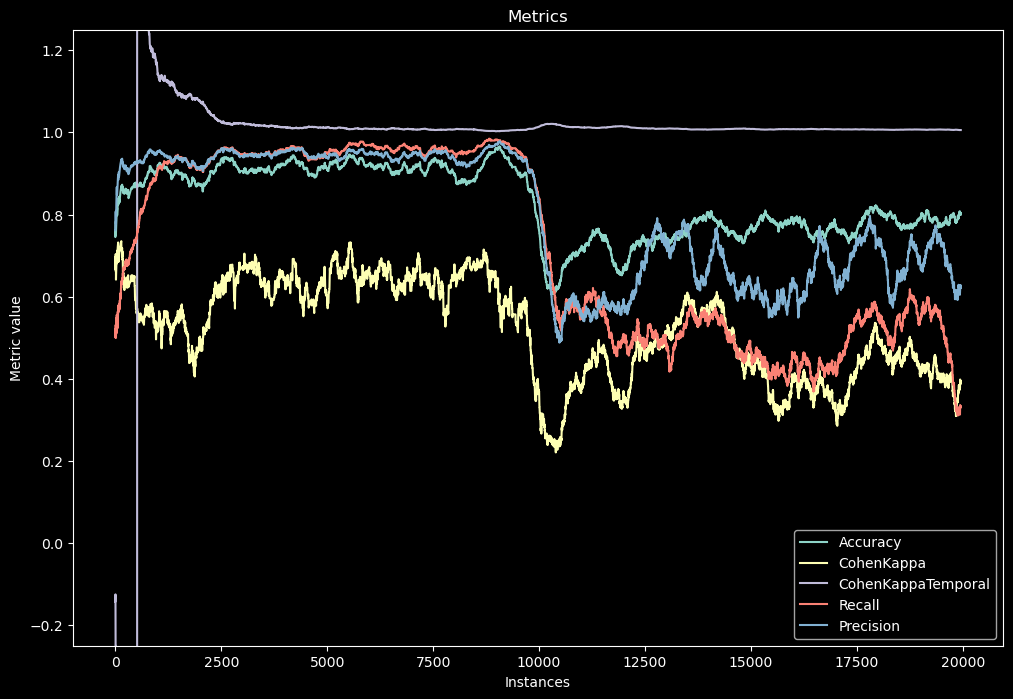

final scores saved for this run:  {'Accuracy': 0.8, 'CohenKappa': 0.391, 'CohenKappaTemporal': 1.0057, 'Recall': 0.3306, 'Precision': 0.6211}


In [59]:

model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5, num_old_features=0)

results = evaluate_model(drift_source="labels", model=model)

# save final results to numpy array
scores[3, :, 2] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[3, :, 2]))
print("final scores saved for this run: ", final_score)

Using temporal augmentation to add both old labels and old features to the features set

Accuracy: 90.40%, 1000
Accuracy: 88.00%, 2000
Accuracy: 90.80%, 3000
Accuracy: 93.60%, 4000
Accuracy: 92.20%, 5000
Accuracy: 92.60%, 6000
Accuracy: 92.40%, 7000
Accuracy: 93.20%, 8000
Accuracy: 95.80%, 9000
Accuracy: 80.20%, 10000
Accuracy: 72.00%, 11000
Accuracy: 76.80%, 12000
Accuracy: 82.20%, 13000
Accuracy: 84.40%, 14000
Accuracy: 81.00%, 15000
Accuracy: 84.00%, 16000
Accuracy: 82.60%, 17000
Accuracy: 84.20%, 18000
Accuracy: 85.80%, 19000
Accuracy: 80.20%, 20000
CohenKappa: 46.22%, 1000
CohenKappa: 49.35%, 2000
CohenKappa: 66.70%, 3000
CohenKappa: 64.82%, 4000
CohenKappa: 62.05%, 5000
CohenKappa: 64.70%, 6000
CohenKappa: 63.36%, 7000
CohenKappa: 63.18%, 8000
CohenKappa: 64.39%, 9000
CohenKappa: 37.91%, 10000
CohenKappa: 57.27%, 11000
CohenKappa: 46.26%, 12000
CohenKappa: 44.14%, 13000
CohenKappa: 60.07%, 14000
CohenKappa: 43.21%, 15000
CohenKappa: 54.63%, 16000
CohenKappa: 51.52%, 17000
CohenKappa: 64.06%, 18000
CohenKappa: 61.03%, 19000
CohenKappa: 60.95%, 20000
CohenKappaTemporal

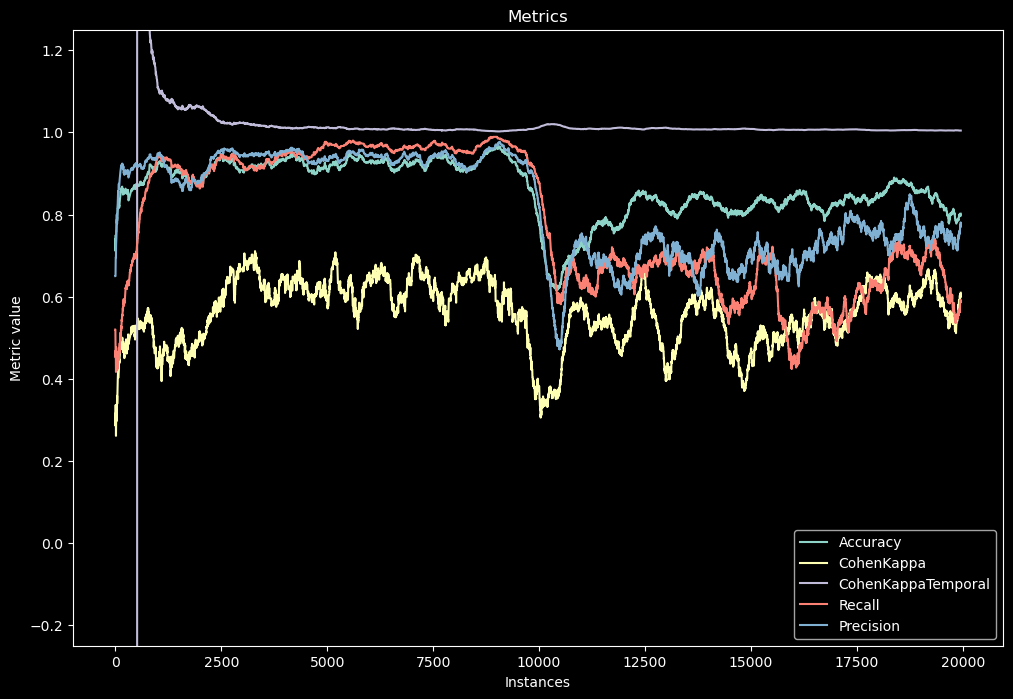

final scores saved for this run:  {'Accuracy': 0.802, 'CohenKappa': 0.6095, 'CohenKappaTemporal': 1.0045, 'Recall': 0.5868, 'Precision': 0.7733}


In [60]:

model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5, num_old_features=5)

results = evaluate_model(drift_source="labels", model=model)

# save final results to numpy array
scores[4, :, 2] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[4, :, 2]))
print("final scores saved for this run: ", final_score)

Here these plots show the expected results. There is clear evidence of concept drift, due to the dip in the classification accuracy and the other metrics employed. Also the temporal augmentation works very well in this case, showing a clear increase in the accuracy. Moreover, the models using the adaptive algorithm, such as ADWIN concept drift detector, perform better at handling the concept drift, and are able to maintain relatively high accuracy.

## Streaming Machine Learning Ensemble models on both datasets with concept drift


Evaluation of the datasets with ensemble models, showing a clear increase of the classification accuracy compared to their relative single models. This increase in accuracy is paid with an increase of computational resources required to classify the data

In [61]:
#import hoeffding adaptive tree classifier and streaming random patches classifier
from river.ensemble import SRPClassifier, AdaptiveRandomForestClassifier
# import adwin from river
from river.drift import ADWIN

### Evaluate ensembles on the dataset with drift in the features composition

Accuracy: 70.80%, 1000
Accuracy: 67.40%, 2000
Accuracy: 71.40%, 3000
Accuracy: 59.20%, 4000
Accuracy: 71.20%, 5000
Accuracy: 65.20%, 6000
Accuracy: 71.00%, 7000
Accuracy: 63.40%, 8000
Accuracy: 62.60%, 9000
Accuracy: 61.80%, 10000
Accuracy: 66.60%, 11000
Accuracy: 68.40%, 12000
Accuracy: 65.60%, 13000
Accuracy: 69.60%, 14000
Accuracy: 59.20%, 15000
Accuracy: 72.60%, 16000
Accuracy: 68.00%, 17000
Accuracy: 62.40%, 18000
Accuracy: 68.40%, 19000
Accuracy: 75.20%, 20000
CohenKappa: 10.45%, 1000
CohenKappa: 9.77%, 2000
CohenKappa: 8.39%, 3000
CohenKappa: 8.76%, 4000
CohenKappa: 11.40%, 5000
CohenKappa: 5.78%, 6000
CohenKappa: 2.14%, 7000
CohenKappa: 10.62%, 8000
CohenKappa: 9.32%, 9000
CohenKappa: 2.87%, 10000
CohenKappa: 12.02%, 11000
CohenKappa: 5.09%, 12000
CohenKappa: 3.67%, 13000
CohenKappa: 15.60%, 14000
CohenKappa: 3.60%, 15000
CohenKappa: 12.89%, 16000
CohenKappa: 2.47%, 17000
CohenKappa: 9.93%, 18000
CohenKappa: 2.79%, 19000
CohenKappa: 18.28%, 20000
CohenKappaTemporal: 142.15%, 10

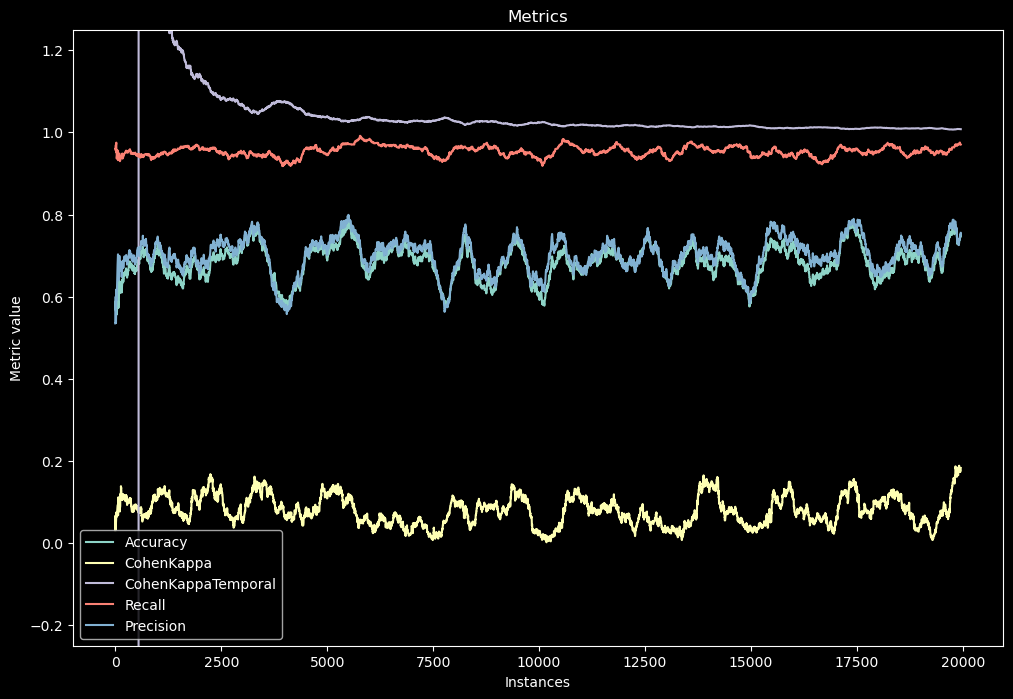

final scores saved for this run:  {'Accuracy': 0.752, 'CohenKappa': 0.18280000000000002, 'CohenKappaTemporal': 1.0078, 'Recall': 0.9703, 'Precision': 0.7553}


In [62]:

# create streaming random patches classifier model
model = SRPClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN(), model=HoeffdingTreeClassifier())

results = evaluate_model(drift_source="features", model=model)

# save final results to numpy array
scores[5, :, 1] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[5, :, 1]))
print("final scores saved for this run: ", final_score)

Accuracy: 69.20%, 1000
Accuracy: 65.80%, 2000
Accuracy: 70.40%, 3000
Accuracy: 57.60%, 4000
Accuracy: 70.60%, 5000
Accuracy: 64.40%, 6000
Accuracy: 71.20%, 7000
Accuracy: 63.20%, 8000
Accuracy: 62.00%, 9000
Accuracy: 63.40%, 10000
Accuracy: 67.00%, 11000
Accuracy: 66.80%, 12000
Accuracy: 65.20%, 13000
Accuracy: 69.80%, 14000
Accuracy: 59.60%, 15000
Accuracy: 72.80%, 16000
Accuracy: 67.80%, 17000
Accuracy: 62.40%, 18000
Accuracy: 68.80%, 19000
Accuracy: 74.20%, 20000
CohenKappa: 3.63%, 1000
CohenKappa: 9.00%, 2000
CohenKappa: 13.42%, 3000
CohenKappa: 6.02%, 4000
CohenKappa: 6.73%, 5000
CohenKappa: 7.26%, 6000
CohenKappa: 10.08%, 7000
CohenKappa: 16.48%, 8000
CohenKappa: 10.07%, 9000
CohenKappa: 9.77%, 10000
CohenKappa: 20.19%, 11000
CohenKappa: 17.28%, 12000
CohenKappa: 8.84%, 13000
CohenKappa: 12.82%, 14000
CohenKappa: 15.67%, 15000
CohenKappa: 16.69%, 16000
CohenKappa: 10.42%, 17000
CohenKappa: 15.11%, 18000
CohenKappa: 12.90%, 19000
CohenKappa: 20.27%, 20000
CohenKappaTemporal: 145.0

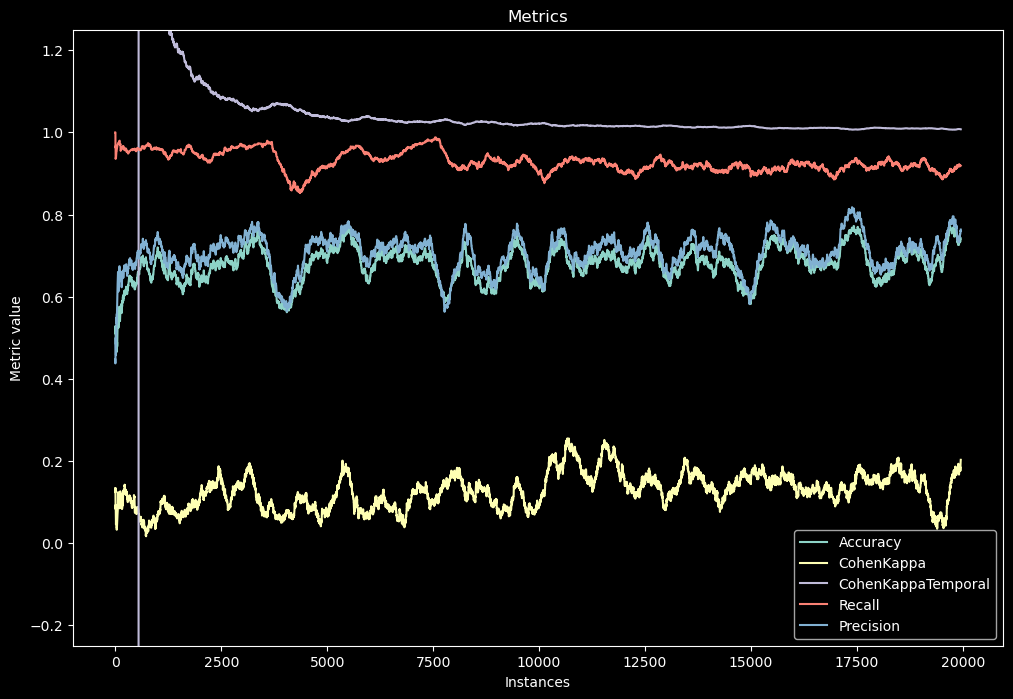

final scores saved for this run:  {'Accuracy': 0.742, 'CohenKappa': 0.2027, 'CohenKappaTemporal': 1.0076, 'Recall': 0.9189, 'Precision': 0.7634000000000001}


In [63]:

# create adaptive random forest classifier model
model = AdaptiveRandomForestClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN())

results = evaluate_model(drift_source="features", model=model)

# save final results to numpy array
scores[6, :, 1] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[6, :, 1]))
print("final scores saved for this run: ", final_score)

### Evaluate ensembles on the dataset with drift in the labeling function

Accuracy: 85.40%, 1000
Accuracy: 79.60%, 2000
Accuracy: 83.20%, 3000
Accuracy: 86.60%, 4000
Accuracy: 86.40%, 5000
Accuracy: 84.00%, 6000
Accuracy: 83.80%, 7000
Accuracy: 86.20%, 8000
Accuracy: 90.80%, 9000
Accuracy: 76.40%, 10000
Accuracy: 75.20%, 11000
Accuracy: 73.60%, 12000
Accuracy: 75.80%, 13000
Accuracy: 78.80%, 14000
Accuracy: 76.60%, 15000
Accuracy: 78.80%, 16000
Accuracy: 77.80%, 17000
Accuracy: 76.20%, 18000
Accuracy: 76.80%, 19000
Accuracy: 78.00%, 20000
CohenKappa: 0.00%, 1000
CohenKappa: 2.23%, 2000
CohenKappa: 0.00%, 3000
CohenKappa: 0.00%, 4000
CohenKappa: 0.00%, 5000
CohenKappa: 0.00%, 6000
CohenKappa: 0.00%, 7000
CohenKappa: 0.00%, 8000
CohenKappa: 0.00%, 9000
CohenKappa: 0.00%, 10000
CohenKappa: 16.11%, 11000
CohenKappa: 26.94%, 12000
CohenKappa: 35.11%, 13000
CohenKappa: 31.76%, 14000
CohenKappa: 24.28%, 15000
CohenKappa: 23.36%, 16000
CohenKappa: 25.80%, 17000
CohenKappa: 29.19%, 18000
CohenKappa: 20.34%, 19000
CohenKappa: 20.64%, 20000
CohenKappaTemporal: 117.93%,

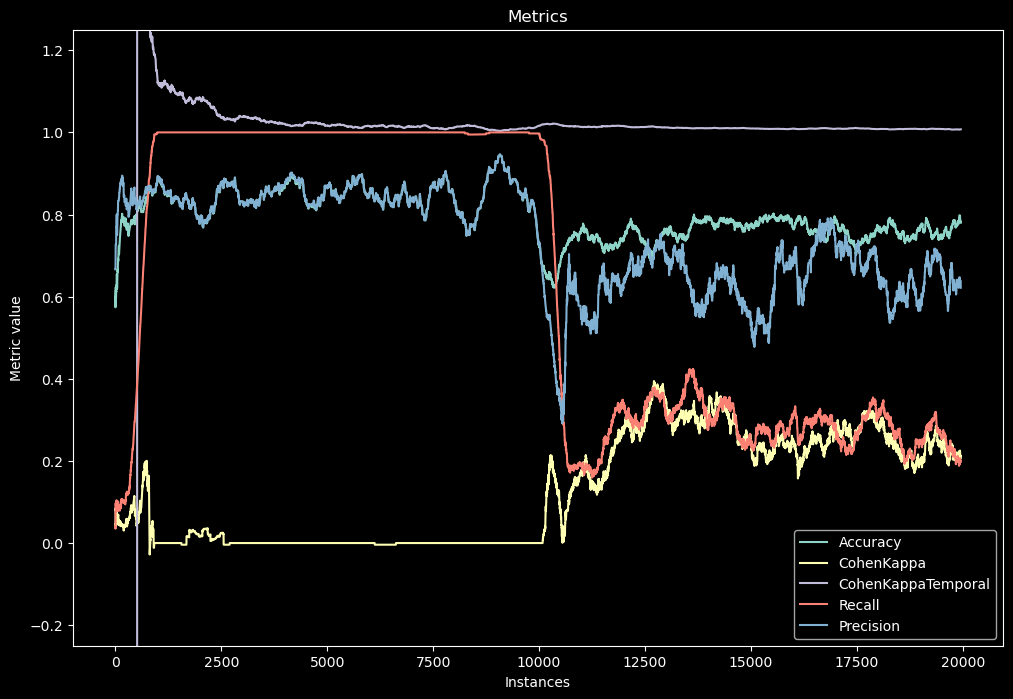

final scores saved for this run:  {'Accuracy': 0.78, 'CohenKappa': 0.2064, 'CohenKappaTemporal': 1.0073999999999999, 'Recall': 0.19829999999999998, 'Precision': 0.6215999999999999}


In [64]:

# create streaming random patches classifier model
model = SRPClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN(), model=HoeffdingTreeClassifier())

results = evaluate_model(drift_source="labels", model=model)

# save final results to numpy array
scores[5, :, 2] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[5, :, 2]))
print("final scores saved for this run: ", final_score)


Accuracy: 85.60%, 1000
Accuracy: 79.20%, 2000
Accuracy: 83.40%, 3000
Accuracy: 87.00%, 4000
Accuracy: 86.40%, 5000
Accuracy: 83.80%, 6000
Accuracy: 84.20%, 7000
Accuracy: 85.80%, 8000
Accuracy: 90.40%, 9000
Accuracy: 76.40%, 10000
Accuracy: 71.60%, 11000
Accuracy: 71.00%, 12000
Accuracy: 77.60%, 13000
Accuracy: 78.80%, 14000
Accuracy: 75.60%, 15000
Accuracy: 78.20%, 16000
Accuracy: 79.80%, 17000
Accuracy: 78.80%, 18000
Accuracy: 75.20%, 19000
Accuracy: 77.00%, 20000
CohenKappa: -0.40%, 1000
CohenKappa: 0.00%, 2000
CohenKappa: -1.17%, 3000
CohenKappa: -0.78%, 4000
CohenKappa: 0.00%, 5000
CohenKappa: -1.17%, 6000
CohenKappa: 0.00%, 7000
CohenKappa: 4.89%, 8000
CohenKappa: 0.00%, 9000
CohenKappa: 0.00%, 10000
CohenKappa: 13.29%, 11000
CohenKappa: 27.58%, 12000
CohenKappa: 42.33%, 13000
CohenKappa: 38.70%, 14000
CohenKappa: 31.56%, 15000
CohenKappa: 26.29%, 16000
CohenKappa: 32.78%, 17000
CohenKappa: 35.43%, 18000
CohenKappa: 26.51%, 19000
CohenKappa: 31.45%, 20000
CohenKappaTemporal: 120.

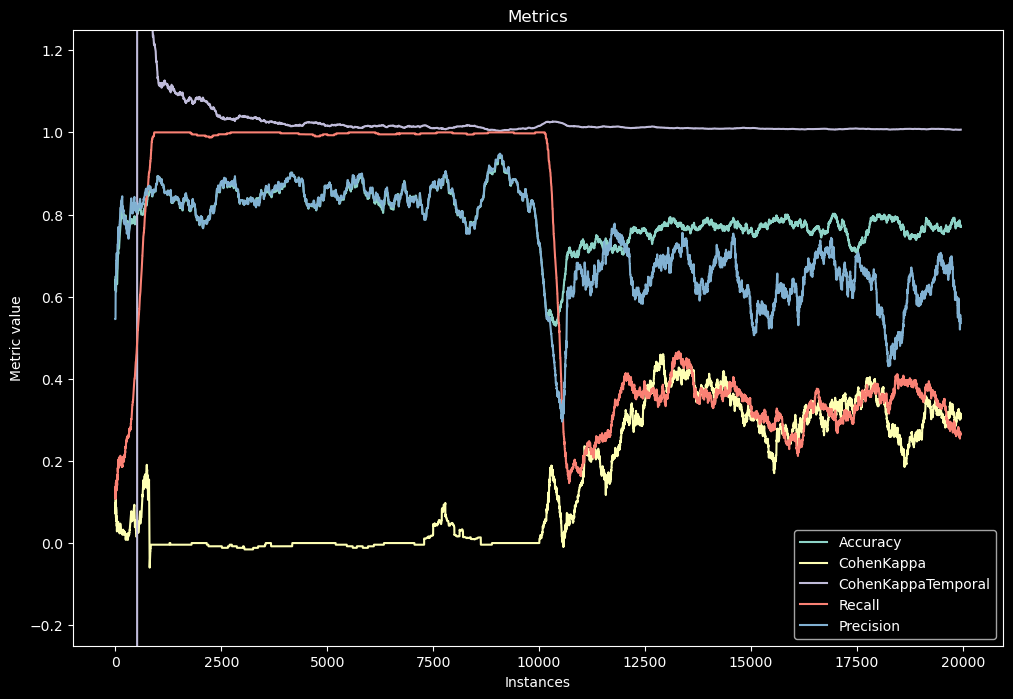

final scores saved for this run:  {'Accuracy': 0.77, 'CohenKappa': 0.3145, 'CohenKappaTemporal': 1.0066, 'Recall': 0.2645, 'Precision': 0.5357}


In [65]:
# create adaptive random forest classifier model
model = AdaptiveRandomForestClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN())

results = evaluate_model(drift_source="labels", model=model)

# save final results to numpy array
scores[6, :, 2] = results[dataset_size[0] - 1, :]
final_score = dict(zip(labels, scores[6, :, 2]))
print("final scores saved for this run: ", final_score)

## Visualization of the performance of the models for the different datasets

In [66]:
# visualize table of scores where the columns are the metrics names and the rows are the models used for training
scores = np.around(scores, decimals=3)

index = ['Naive Bayes', 'Hoeffding Tree', 'Hoeffding Adaptive Tree (H.A.T.)', 'Temporally Augmented H.A.T. with old labels', 'Temporally Augmented H.A.T. with old labels and old features', 'Streaming Random Patches with ADWIN', 'Adaptive Random Forest with ADWIN']

columns = ["Accuracy", "CohenKappa", "CohenKappaTemporal", "Precision", "Recall"]


Showing the results for the dataset with the drift in the features

In [67]:

# display table from numpy array scores
df1 = pd.DataFrame(scores[:, :, 1], index=index, columns=columns)
# add nice background colors for the table headings and rows names to the df
df1.style \
    .set_table_styles([dict(selector="th", props=[('background-color', 'darkorange')])]) \
	.format("{:.3f}") \
    .set_caption("Prequential Evaluation Results of dataset with features drift")



,Accuracy,CohenKappa,CohenKappaTemporal,Precision,Recall
Naive Bayes,0.748,0.192,1.008,0.938,0.775
Hoeffding Tree,0.746,0.135,1.008,0.940,0.772
Hoeffding Adaptive Tree (H.A.T.),0.746,0.200,1.008,0.970,0.758
Temporally Augmented H.A.T. with old labels,0.882,0.677,1.003,0.957,0.904
Temporally Augmented H.A.T. with old labels and old features,0.902,0.676,1.003,0.932,0.922
Streaming Random Patches with ADWIN,0.752,0.183,1.008,0.970,0.755
Adaptive Random Forest with ADWIN,0.742,0.203,1.008,0.919,0.763


**Results analysis:**
- Here we can see that ensemble models do not perform significantly better than the single models, meaning that a single decision tree classifier is enough for this dataset.
- Using the temporal augmentation script significantly outperforms the models that are not augmented
- We can also see that the temporal augmentation adding both old labels and features doesn't really improve the prediction accuracy compared to the temporal augmentation with only the old labels. An explanation for this is in the conclusions paragraph below
- We can also see that adding the ADWIN concept drift detector, compared to the decision trees that do not make use of it, doesn't result in a final higher accuracy. In fact, concept drift was not detected in this dataset.

Showing the results for the dataset with the drift in the labeling function

In [68]:
# display table from numpy array scores
df2 = pd.DataFrame(scores[:, :, 2], index=index, columns=columns)
# add nice background colors for the table headings and rows names to the df
df2.style \
    .set_table_styles([dict(selector="th", props=[('background-color', 'darkorange')])]) \
	.format("{:.3f}") \
    .set_caption("Prequential Evaluation Results of dataset with labeling drift")



,Accuracy,CohenKappa,CohenKappaTemporal,Precision,Recall
Naive Bayes,0.530,0.216,1.015,0.934,0.336
Hoeffding Tree,0.766,0.350,1.010,0.826,0.372
Hoeffding Adaptive Tree (H.A.T.),0.776,0.345,1.007,0.413,0.605
Temporally Augmented H.A.T. with old labels,0.800,0.391,1.006,0.331,0.621
Temporally Augmented H.A.T. with old labels and old features,0.802,0.610,1.004,0.587,0.773
Streaming Random Patches with ADWIN,0.780,0.206,1.007,0.198,0.622
Adaptive Random Forest with ADWIN,0.770,0.314,1.007,0.264,0.536


**Results analysis:**
- Here we can see that ensemble models do not perform significantly better than the single models, meaning that a single decision tree classifier is enough for this dataset.
- We can also see that the temporal augmentation adding both old labels and features doesn't really improve the prediction accuracy compared to the temporal augmentation with only the old labels. An explanation for this is in the conclusions paragraph below
- We can also see that adding the ADWIN concept drift detector, compared to the algorithms that do not make use of it, results in a higher final accuracy (reached also faster), because the concept drift was successfully detected by ADWIN

Showing the final metric values for the dataset with no concept drift added

In [69]:
# display table from numpy array scores
df0 = pd.DataFrame(scores[:-3, :, 0], index=index[:-3], columns=columns)
# add nice background colors for the table headings and rows names to the df
df0.style \
    .set_table_styles([dict(selector="th", props=[('background-color', 'darkorange')])]) \
	.format("{:.3f}") \
    .set_caption("Prequential Evaluation Results of dataset with no drift")



,Accuracy,CohenKappa,CohenKappaTemporal,Precision,Recall
Naive Bayes,0.838,0.000,1.005,1.000,0.838
Hoeffding Tree,0.834,-0.008,1.005,0.995,0.838
Hoeffding Adaptive Tree (H.A.T.),0.894,0.626,1.003,0.959,0.926
Temporally Augmented H.A.T. with old labels,0.906,0.675,1.002,0.971,0.939


**Results analysis:**
- We can see that the temporal augmentation adding both old labels and features doesn't really improve the prediction accuracy compared to the temporal augmentation with only the old labels. An explanation for this is in the conclusions paragraph below
- We can also see that adding the ADWIN concept drift detector doesn't change much the results, because there is in fact no concept drift.

# Conclusions

**Explanation of the apparent absence of concept drift in the `dataset_drift_features`:**

From this dataset and the models used, it appears that the models work relatively well, also with the use of the temporal augmentation. Although it doesn't seem that there is evidence of any concept drift happening during the model training. This result was at first not expected, since the dataset is created with the concept drift in the creation of the various features. But here the models seem to perform well regardless of the concept drift.

- What happens by using `TemporallyAugmentedClassifier(model, num_old_labels=5, num_old_features=0)` -> adding old labels to the list of features?

> The explanation is that such behavior is due to the models trying to predict the current label using information that includes the current feature values and the past labels. But the data that the online models see do not include also the past features values. Since the features values depend only on their past values (and the past values of the other features), the models develop a non-linear approximation of the binary labeling function using the current data available. The current data doesn't include instead the data that would demonstrate a change in the distribution of the feature values. This implies that the models can't develop a non-linear combination of all useful data, therefore they cannot see this type of concept drift happening.

**_Hypothesis_**: 
_If the streaming machine learning models were to see also the past feature values, then they would develop a non linear combination of all useful data. Therefore, if a concept drift would happen in this scenario, they would be able to see it, since the current data depends also on the past data, which shows a time dependency._

- If this is also true, what happens by using `TemporallyAugmentedClassifier(model, num_old_labels=5, num_old_features=5)` -> adding both old labels and old features to the feature set?

> The plots above are clear, showing that even adding the old features doesn't show any effect in the metrics values. So it appears that there isn't really any concept drift happening during the models training, since there isn't any drop in the accuracy nor in the other metrics. However, we can also see that adding the old features doesn't increase the accuracy overall, and this result was not expected as well. I was expecting that more features for the predictions would increase the accuracy of the predictions, but didn't happen. This means that those new features are not informative enough.
> 
> There is a possible explanation to what is happening here though. The reason is to be found in the coefficients used to create the dataset, specifically in the linear combination of the features (mimicking a quadratic combination of all features and noise). Those coefficients are very small, and the reason is explained in details in the other notebook [Data Generator](NARMA_Data_Generator.ipynb). So it is not possible to increase significantly the coefficients of the time series while having an asymptotically stable time series. Increasing them would make the time series unstable, which is of no use and value. Since the time series are non-linear, the threshold for the stability of the time series is reduced a lot with respect to the limit of $1$ required for linear ARMA time series.
> 
> If the coefficients are small in value, it means that there is a small correlation between the label $y(t)$ and the past features $X(t-i) \; \text{for} \; i \in [1,5]$ at any time $t$. This small correlation means that those variables are not really significant to make any predictions on the value for the label. In fact, they give too small information gain to be relevant to the predictions. So, in a way we could say that the model "learns weights" for those variables that are too small to have any relevant effect in the prediction.
>
> The Hoeffding Tree algorithm compares the statistical measures for each attribute (feature) and selects the one that maximizes the information gain or minimizes the impurity measure (e.g., Gini index) as the splitting criterion. Sp the model, instead of assigning weights to individual attributes, it dynamically selects the most relevant attribute to split the tree at each node based on the observed data statistics. Therefore, it is very likely that the set of the most relevant attributes do not include the past features set.
> 
> Therefore the model doesn't change much over time, during the training process, even though the statistical distribution of the attributes (features) changes slightly over time. So, its performance also doesn't really change overall during training. Summing up, the changes are there but so small that they are not noticeable, because if the weights are small, the model is able to change them quickly over the training. Whereas if the weights were large, the model would take noticeable time to change them in order to improve its accuracy.

- Is there a possible solution or workaround to show the concept drift in that dataset?

> The straightforward solution would be to increase the coefficients values, but it would make the time series unstable. The upper value used in the generator notebook is found empirically as the maximum value, up to which the model remains asymptotically stable.
>
> The coefficients can be actually increased up to 1, but this would work only if the time series is linear in its features and parameters. And making the time series linear would mean to change the project and its purpose entirely. This upper value of 1 for the stability for the linear time series is demonstrated in the theoretical aspects of ARMA time series, a topic deeply covered in the course "Model Identification and Data Analysis"
>
> Another possible solution would be to decrease the number of parameters in the dataset creation. This dataset uses 6 features, combined in a way to produce 136 parameters. Empirical tests showed that the instability threshold for the coefficients values increases as the number of parameters decreases. But decreasing the number of parameters would create a very simple time series with reduced temporal dependencies between features and labels in time.
>
> Another possible solution, but less effective than the ones above, is to decrease the time series length drastically. But then the application of streaming machine learning models wouldn't be as interesting as they are in this notebook, because they require a lot of time steps in order to produce a valid and effective online model.

These phenomenons explain why the streaming machine learning models can predict well the data without suffering from concept drift. And these phenomenons are not seen in the other dataset because of its different construction, which forces the model to re-learn all of its weights in order to have a high prediction accuracy.

**What about the `dataset_drift_labels`?**

The other dataset changes its labeling function and also the variables for which the label depends on. This forces the model to change completely in order to have good predictions after the concept drift. The Hoeffding tree algorithm computes the information gain statistics at the arrival of each sample. So it develops a tree heavily dependent on the relevant attributes (features) in the dataset, because they are the most significant and most informative. But if the most informative features change over time, because the labeling function changes, it forces the model to readjust itself in order to maintain high prediction accuracy. So the concept drift happens and it is successfully detected by the ADWIN concept drift detector algorithm.

As a result, in this specific setting and application, it was much more effective to create a dataset where the concept drift is in the change of the classification function, rather than in the creation of the features set.